# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, Model, Input
from sklearn.model_selection import train_test_split

# Load Dataset

In [ ]:
# Load Data
makanan_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1am3u3VInExUzquYCy5yH0PKC7jJBTCc5zNICVqamQyI/export?format=csv')
penyakit_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1CTnIleCTcbll7fWKy4CdmSN-XxtNjJP6GuBx7PREYl8/export?format=csv')

# Tampilkan data
print(makanan_df.head())
print(penyakit_df.head())


   No                              food                            makanan  \
0   1                      cream cheese                          krim keju   
1   2                 neufchatel cheese                    keju neufchatel   
2   3  requeijao cremoso light catupiry  requeijao cremoso catupiry ringan   
3   4                    ricotta cheese                       keju ricotta   
4   5              cream cheese low fat             keju krim rendah lemak   

   kalori  lemak  karbohidrat  gula  protein  serat  kolesterol  ...  \
0      51    5.0          0.8   0.5      0.9    0.0        14.6  ...   
1     215   19.4          3.1   2.7      7.8    0.0        62.9  ...   
2      49    3.6          0.9   3.4      0.8    0.1         0.0  ...   
3      30    2.0          1.5  91.0      1.5    0.0         9.8  ...   
4      30    2.3          1.2   0.9      1.2    0.0         8.1  ...   

   vitamin_D  vitamin_E  vitamin_K  kalsium  zat_besi  magnesium  fosfor  \
0        0.0        0.

# Exploratory Data Analysis

In [ ]:
print("Lima baris pertama data makanan:")
print(makanan_df.head())

Lima baris pertama data makanan:
   No                              food                            makanan  \
0   1                      cream cheese                          krim keju   
1   2                 neufchatel cheese                    keju neufchatel   
2   3  requeijao cremoso light catupiry  requeijao cremoso catupiry ringan   
3   4                    ricotta cheese                       keju ricotta   
4   5              cream cheese low fat             keju krim rendah lemak   

   kalori  lemak  karbohidrat  gula  protein  serat  kolesterol  ...  \
0      51    5.0          0.8   0.5      0.9    0.0        14.6  ...   
1     215   19.4          3.1   2.7      7.8    0.0        62.9  ...   
2      49    3.6          0.9   3.4      0.8    0.1         0.0  ...   
3      30    2.0          1.5  91.0      1.5    0.0         9.8  ...   
4      30    2.3          1.2   0.9      1.2    0.0         8.1  ...   

   vitamin_D  vitamin_E  vitamin_K  kalsium  zat_besi  magnesium 

In [ ]:
print("Lima baris pertama data penyakit:")
print(penyakit_df.head())

Lima baris pertama data penyakit:
   no nama penyakit                                 nutrisi disarankan  \
0   1     Influenza                                     kaya vitamin c   
1   2         Liver                                     protein tinggi   
2   3      Diabetes                       serat tinggi, protein sedang   
3   4        Anemia  zat besi tinggi, vitamin c tinggi, protein tinggi   
4   5         Diare                        rendah serat, cairan tinggi   

                           nutrisi dihindari  \
0                              gula tinggi,    
1  tinggi lemak, tinggi gula, natrium tinggi   
2                   gula tinggi, karbohidrat   
3                             tinggi kalsium   
4                 tinggi serat, lemak tinggi   

                                       saran makanan  \
0                      bawang putih, kaldu, sup ayam   
1  sayuran hijau, buah-buahan, biji-bijian, teh h...   
2  sayuran hijau, biji-bijian, buah-buahan, bawan...   
3  dagin

In [ ]:
penyakit_df.columns.tolist()

['no',
 'nama penyakit',
 'nutrisi disarankan',
 'nutrisi dihindari',
 'saran makanan',
 'makanan dihindari']

In [ ]:
print("\nInformasi kolom makanan:")
print(makanan_df.info())


Informasi kolom makanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 2022 non-null   int64  
 1   food               2022 non-null   object 
 2   makanan            2022 non-null   object 
 3   kalori             2022 non-null   int64  
 4   lemak              2022 non-null   float64
 5   karbohidrat        2022 non-null   float64
 6   gula               2022 non-null   float64
 7   protein            2022 non-null   float64
 8   serat              2022 non-null   float64
 9   kolesterol         2022 non-null   float64
 10  natrium            2022 non-null   float64
 11  air                2022 non-null   float64
 12  vitamin_A          2022 non-null   float64
 13  vitamin_B1         2022 non-null   float64
 14  vitamin_B11        2022 non-null   float64
 15  vitamin_B12        2022 non-null   float64
 16

In [ ]:
print("\nStatistik deskriptif makanan:")
print(makanan_df.describe())


Statistik deskriptif makanan:
                No       kalori        lemak  karbohidrat         gula  \
count  2022.000000  2022.000000  2022.000000  2022.000000  2022.000000   
mean   1011.500000   208.774975    14.758289    18.507413     7.418660   
std     583.845442   406.973446    34.591851    30.904953    19.075288   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     506.250000    36.000000     0.400000     0.600000     0.000000   
50%    1011.500000   102.000000     2.450000     6.050000     0.300000   
75%    1516.750000   211.000000    12.475000    22.900000     5.375000   
max    2022.000000  6077.000000   550.700000   390.200000   291.500000   

           protein        serat   kolesterol      natrium          air  ...  \
count  2022.000000  2022.000000  2022.000000  2022.000000  2022.000000  ...   
mean     13.981805     3.693818    27.669683    24.956909    74.779080  ...   
std      34.635550    10.555459    84.587780    31.581427    98.3

In [ ]:
print("\nInformasi kolom penyakit:")
print(penyakit_df.info())


Informasi kolom penyakit:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   no                  26 non-null     int64 
 1   nama penyakit       26 non-null     object
 2   nutrisi disarankan  26 non-null     object
 3   nutrisi dihindari   22 non-null     object
 4   saran makanan       26 non-null     object
 5   makanan dihindari   26 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB
None


In [ ]:
print("\nStatistik deskriptif penyakit:")
print(penyakit_df.describe())


Statistik deskriptif penyakit:
              no
count  26.000000
mean   13.500000
std     7.648529
min     1.000000
25%     7.250000
50%    13.500000
75%    19.750000
max    26.000000


In [ ]:
makanan_df = makanan_df.drop(columns=['No','food'])
penyakit_df = penyakit_df.drop(columns=['no'])

In [ ]:
print(f"Data null dari data makanan : {makanan_df.isna().sum()}\n")

Data null dari data makanan : makanan              0
kalori               0
lemak                0
karbohidrat          0
gula                 0
protein              0
serat                0
kolesterol           0
natrium              0
air                  0
vitamin_A            0
vitamin_B1           0
vitamin_B11          0
vitamin_B12          0
vitamin_B2           0
vitamin_B3           0
vitamin_B5           0
vitamin_B6           0
vitamin_C            0
vitamin_D            0
vitamin_E            0
vitamin_K            0
kalsium              0
zat_besi             0
magnesium            0
fosfor               0
kalium               0
zinc                 0
kepadatan_nutrisi    0
dtype: int64



In [ ]:
# Memeriksa data yang mengandung duplikat\
print("Jumlah data makanan yang mengandung duplikat")
print(makanan_df.duplicated().sum())

# Memeriksa data yang mengandung nilai null
print("Jumlah data makanan yang mengandung nilai kosong")
print(makanan_df.isnull().sum())

Jumlah data makanan yang mengandung duplikat
91
Jumlah data makanan yang mengandung nilai kosong
makanan              0
kalori               0
lemak                0
karbohidrat          0
gula                 0
protein              0
serat                0
kolesterol           0
natrium              0
air                  0
vitamin_A            0
vitamin_B1           0
vitamin_B11          0
vitamin_B12          0
vitamin_B2           0
vitamin_B3           0
vitamin_B5           0
vitamin_B6           0
vitamin_C            0
vitamin_D            0
vitamin_E            0
vitamin_K            0
kalsium              0
zat_besi             0
magnesium            0
fosfor               0
kalium               0
zinc                 0
kepadatan_nutrisi    0
dtype: int64


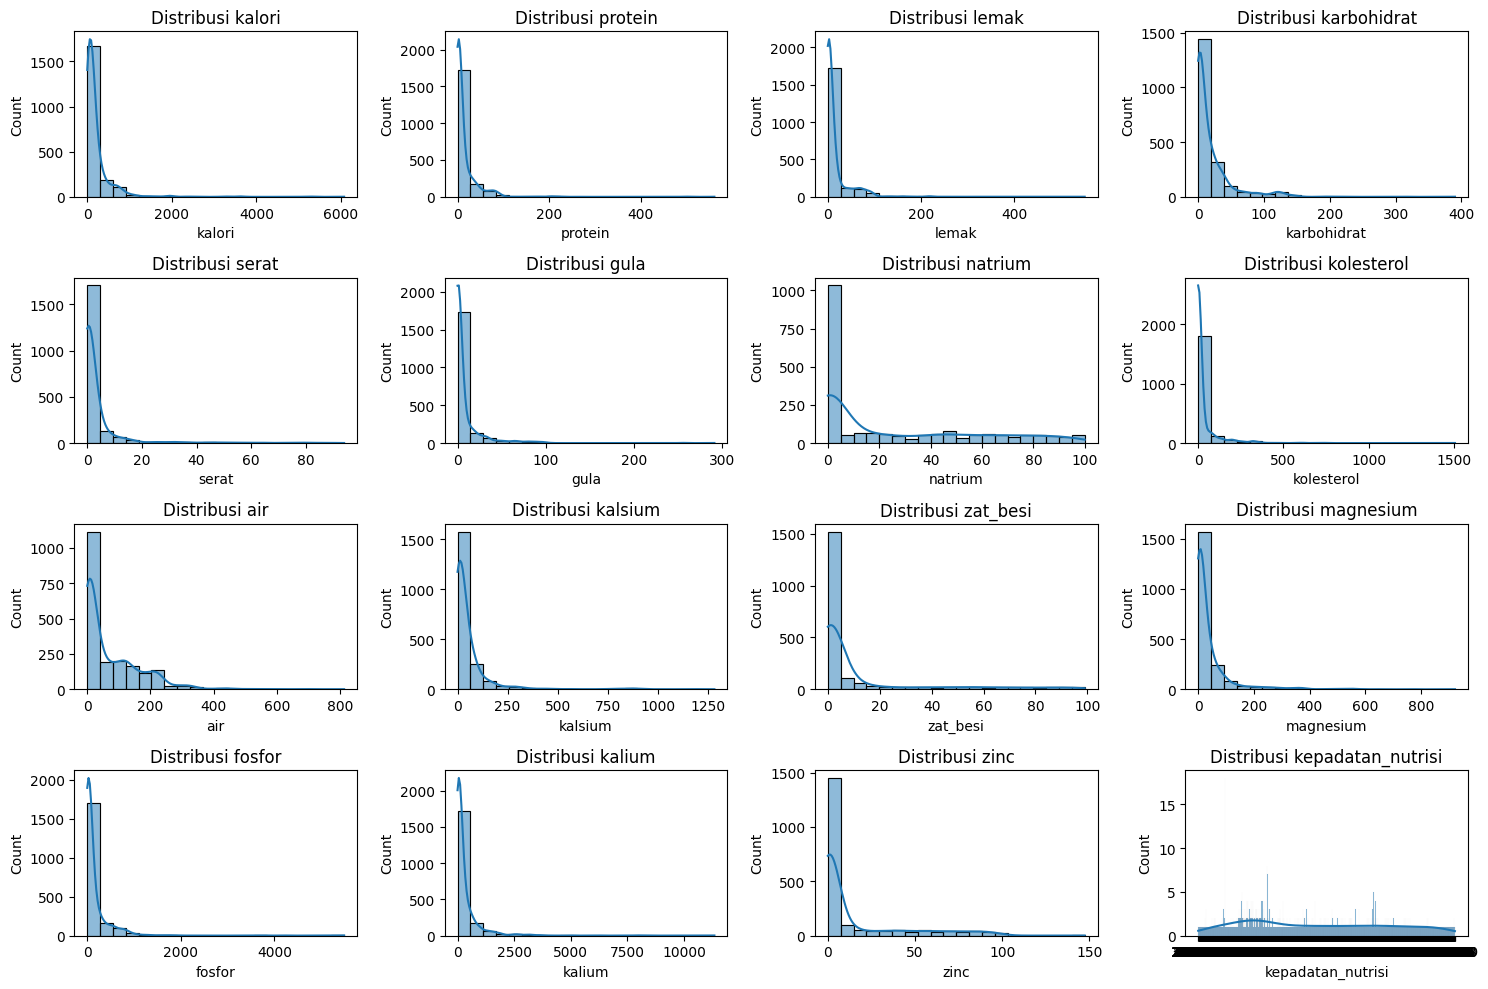

In [ ]:
nutrisi_cols = ['kalori', 'protein', 'lemak', 'karbohidrat', 'serat', 'gula',
                'natrium', 'kolesterol', 'air','kalsium', 'zat_besi', 'magnesium',
                'fosfor', 'kalium', 'zinc', 'kepadatan_nutrisi']

plt.figure(figsize=(15, 10))
for i, col in enumerate(nutrisi_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(makanan_df[col], bins=20, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

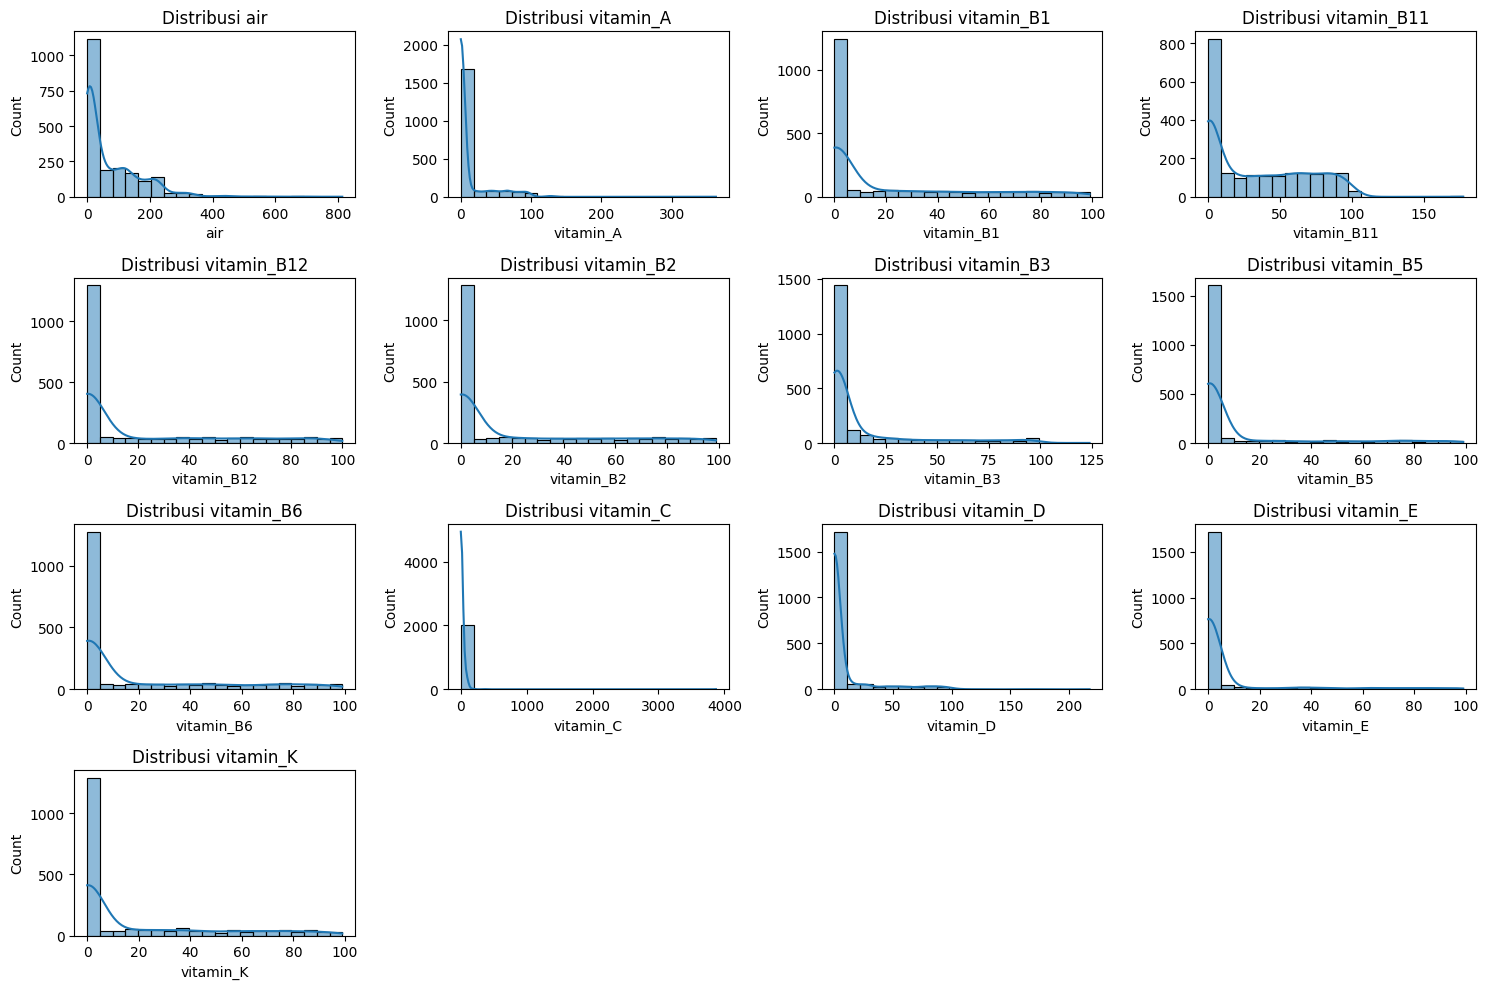

In [ ]:
vitamin_cols = ['air', 'vitamin_A', 'vitamin_B1',
                'vitamin_B11', 'vitamin_B12', 'vitamin_B2', 'vitamin_B3',
                'vitamin_B5', 'vitamin_B6', 'vitamin_C', 'vitamin_D', 'vitamin_E',
                'vitamin_K']

plt.figure(figsize=(15, 10))
for i, col in enumerate(vitamin_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(makanan_df[col], bins=20, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

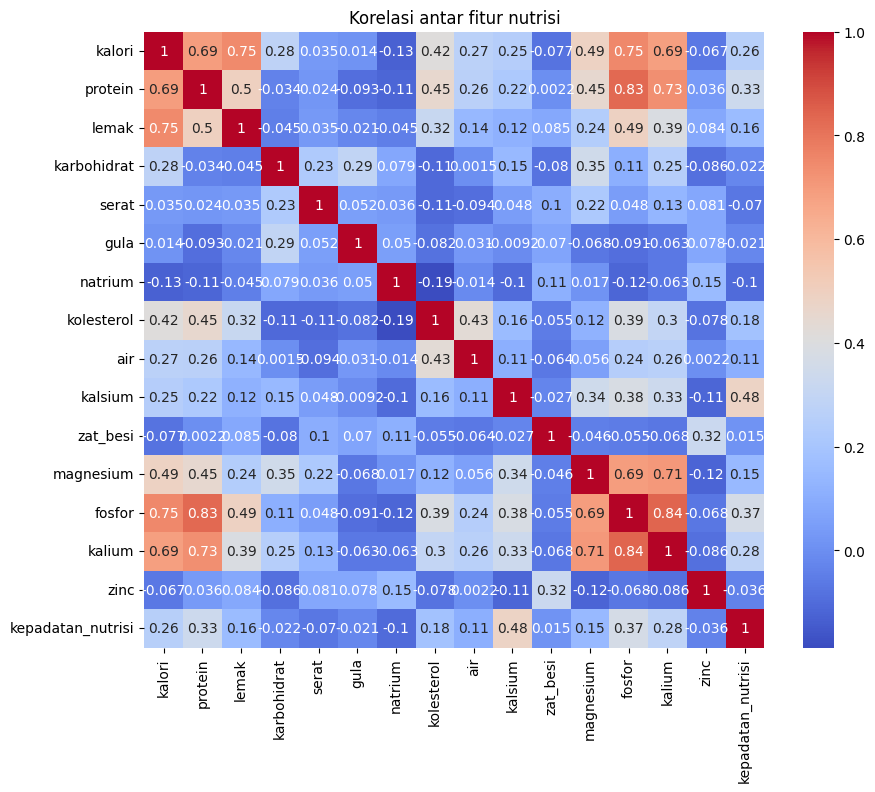

In [ ]:
for col in nutrisi_cols:
    if not pd.api.types.is_numeric_dtype(makanan_df[col]):
        makanan_df[col] = pd.to_numeric(makanan_df[col].str.replace('.', '').replace(',', '.'), errors='coerce')
    else:
        pass

plt.figure(figsize=(10, 8))
corr_matrix = makanan_df[nutrisi_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur nutrisi')
plt.show()

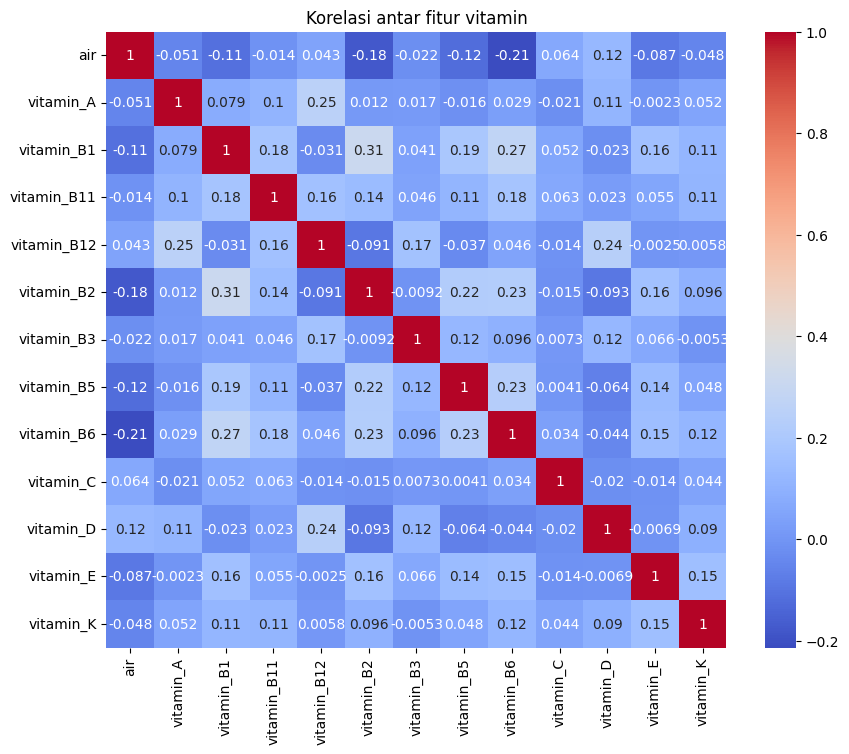

In [ ]:
for col in vitamin_cols:
    if not pd.api.types.is_numeric_dtype(makanan_df[col]):
        makanan_df[col] = pd.to_numeric(makanan_df[col].str.replace('.', '').replace(',', '.'), errors='coerce')
    else:
        pass

plt.figure(figsize=(10, 8))
corr_matrix = makanan_df[vitamin_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar fitur vitamin')
plt.show()

In [ ]:
print("Top 10 makanan dengan gula tertinggi:")
print(makanan_df[['makanan', 'gula']].sort_values(by='gula', ascending=False).head(10))

print("\nTop 10 makanan dengan kalori tertinggi:")
print(makanan_df[['makanan', 'kalori']].sort_values(by='kalori', ascending=False).head(10))

Top 10 makanan dengan gula tertinggi:
                             makanan   gula
523              lapisan gula vanila  291.5
280       danone rendah lemak alsafi  255.0
1203      danone rendah lemak alsafi  255.0
608                  pai krim pisang  143.0
1633  saus cranberry yang dimaniskan  105.0
1845                      selada air   99.0
1796                  lumut Irlandia   98.0
1557                   kerupuk matzo   98.0
856                      kismis emas   97.7
1722                           kecap   97.0

Top 10 makanan dengan kalori tertinggi:
                                      makanan  kalori
1174                      daging angsa mentah    6077
1122                daging babi piknik mentah    5298
1124               lengan babi piknik dimasak    5292
1169                      daging bebek mentah    5123
1120                      lemak punggung babi    3683
1092  daging babi panggang bagian atas mentah    3644
1147                          iga babi mentah    3593
1150 

# Mapping

In [ ]:
# Ambil mapping nutrisi yang disarankan/dihindari untuk tiap penyakit
df_penyakit_mapping = penyakit_df[["nama penyakit", "nutrisi disarankan", "nutrisi dihindari"]].copy()

# Fill NaN values with empty strings to avoid errors
df_penyakit_mapping["nutrisi disarankan"] = df_penyakit_mapping["nutrisi disarankan"].fillna("")
df_penyakit_mapping["nutrisi dihindari"] = df_penyakit_mapping["nutrisi dihindari"].fillna("")

# Buat dictionary mapping
mapping_penyakit = {}
for _, row in df_penyakit_mapping.iterrows():
    penyakit = row["nama penyakit"]
    # Ensure values are strings before splitting
    disarankan = [x.strip().lower() for x in str(row["nutrisi disarankan"]).split(",") if x.strip()]
    dihindari = [x.strip().lower() for x in str(row["nutrisi dihindari"]).split(",") if x.strip()]
    mapping_penyakit[penyakit] = {
        "disarankan": disarankan,
        "dihindari": dihindari
    }

mapping_penyakit

{'Influenza': {'disarankan': ['kaya vitamin c'], 'dihindari': ['gula tinggi']},
 'Liver': {'disarankan': ['protein tinggi'],
  'dihindari': ['tinggi lemak', 'tinggi gula', 'natrium tinggi']},
 'Diabetes': {'disarankan': ['serat tinggi', 'protein sedang'],
  'dihindari': ['gula tinggi', 'karbohidrat']},
 'Anemia': {'disarankan': ['zat besi tinggi',
   'vitamin c tinggi',
   'protein tinggi'],
  'dihindari': ['tinggi kalsium']},
 'Diare': {'disarankan': ['rendah serat', 'cairan tinggi'],
  'dihindari': ['tinggi serat', 'lemak tinggi']},
 'Batu Ginjal': {'disarankan': ['kalsium sedang',
   'cairan tinggi',
   'magnesium',
   'rendah natrium'],
  'dihindari': ['protein hewani berlebih',
   'tinggi oksalat',
   'tinggi natrium',
   'gula tinggi']},
 'Asma': {'disarankan': ['vitamin c dan e', 'magnesium'],
  'dihindari': ['mengandung sufit', 'lemak tinggi']},
 'Asam Lambung': {'disarankan': ['karbohidrat kompleks & berserat',
   'protein rendah lemak',
   'asam lemak omega-3',
   'probiotik'

In [ ]:
# Isi NaN dengan string kosong agar bisa diproses
df_penyakit_mapping["nutrisi disarankan"] = df_penyakit_mapping["nutrisi disarankan"].fillna("")
df_penyakit_mapping["nutrisi dihindari"] = df_penyakit_mapping["nutrisi dihindari"].fillna("")

# Buat ulang mapping
mapping_penyakit = {}
for _, row in df_penyakit_mapping.iterrows():
    penyakit = row["nama penyakit"]
    disarankan = [x.strip().lower() for x in row["nutrisi disarankan"].split(",") if x.strip()]
    dihindari = [x.strip().lower() for x in row["nutrisi dihindari"].split(",") if x.strip()]
    mapping_penyakit[penyakit] = {
        "disarankan": disarankan,
        "dihindari": dihindari
    }

mapping_penyakit

{'Influenza': {'disarankan': ['kaya vitamin c'], 'dihindari': ['gula tinggi']},
 'Liver': {'disarankan': ['protein tinggi'],
  'dihindari': ['tinggi lemak', 'tinggi gula', 'natrium tinggi']},
 'Diabetes': {'disarankan': ['serat tinggi', 'protein sedang'],
  'dihindari': ['gula tinggi', 'karbohidrat']},
 'Anemia': {'disarankan': ['zat besi tinggi',
   'vitamin c tinggi',
   'protein tinggi'],
  'dihindari': ['tinggi kalsium']},
 'Diare': {'disarankan': ['rendah serat', 'cairan tinggi'],
  'dihindari': ['tinggi serat', 'lemak tinggi']},
 'Batu Ginjal': {'disarankan': ['kalsium sedang',
   'cairan tinggi',
   'magnesium',
   'rendah natrium'],
  'dihindari': ['protein hewani berlebih',
   'tinggi oksalat',
   'tinggi natrium',
   'gula tinggi']},
 'Asma': {'disarankan': ['vitamin c dan e', 'magnesium'],
  'dihindari': ['mengandung sufit', 'lemak tinggi']},
 'Asam Lambung': {'disarankan': ['karbohidrat kompleks & berserat',
   'protein rendah lemak',
   'asam lemak omega-3',
   'probiotik'

In [ ]:
# Pilih kolom nutrisi utama yang akan dikategorikan
kolom_nutrisi = [
    "gula", "serat", "protein", "lemak", "karbohidrat", "vitamin_a", "vitamin_c",
    "zat_besi", "kalsium", "natrium", "magnesium", "kolesterol", "kalori", "fosfor",
    "kalium", "zinc", "air", "vitamin_b1", "vitamin_b11", "vitamin_b12", "vitamin_b2",
    "vitamin_b3", "vitamin_b5", "vitamin_b6", "vitamin_d", "vitamin_e", "vitamin_k"
]

# Pastikan semua kolom nutrisi ada di data (jika tidak, abaikan)
kolom_nutrisi = [col for col in kolom_nutrisi if col in makanan_df.columns]

# Buat dict threshold
thresholds = {}
for kolom in kolom_nutrisi:
    q25 = makanan_df[kolom].quantile(0.25)
    q75 = makanan_df[kolom].quantile(0.75)
    thresholds[kolom] = {"rendah": q25, "tinggi": q75}

# Buat dataframe kategori nutrisi: "tinggi", "sedang", "rendah"
df_kat = makanan_df[["makanan"] + kolom_nutrisi].copy()
for kolom in kolom_nutrisi:
    def kategori(x):
        if pd.isna(x):
            return "tidak_ada"
        elif x <= thresholds[kolom]["rendah"]:
            return "rendah"
        elif x >= thresholds[kolom]["tinggi"]:
            return "tinggi"
        else:
            return "sedang"
    df_kat[kolom + "_kategori"] = df_kat[kolom].apply(kategori)

df_kat.head()

,makanan,gula,serat,protein,lemak,karbohidrat,zat_besi,kalsium,natrium,magnesium,...,zat_besi_kategori,kalsium_kategori,natrium_kategori,magnesium_kategori,kolesterol_kategori,kalori_kategori,fosfor_kategori,kalium_kategori,zinc_kategori,air_kategori
0,krim keju,0.5,0.0,0.9,5.0,0.8,82.0,8.0,16.0,27.0,...,tinggi,sedang,sedang,sedang,tinggi,sedang,sedang,rendah,tinggi,sedang
1,keju neufchatel,2.7,0.0,7.8,19.4,3.1,0.1,99.5,0.3,8.5,...,rendah,tinggi,sedang,sedang,tinggi,tinggi,sedang,sedang,sedang,sedang
2,requeijao cremoso catupiry ringan,3.4,0.1,0.8,3.6,0.9,0.0,0.0,0.0,0.0,...,rendah,rendah,rendah,rendah,rendah,sedang,rendah,rendah,rendah,rendah
3,keju ricotta,91.0,0.0,1.5,2.0,1.5,97.0,97.0,17.0,96.0,...,tinggi,tinggi,sedang,tinggi,tinggi,rendah,sedang,sedang,tinggi,sedang
4,keju krim rendah lemak,0.9,0.0,1.2,2.3,1.2,8.0,22.2,46.0,1.2,...,tinggi,sedang,sedang,rendah,tinggi,rendah,sedang,sedang,tinggi,sedang


In [ ]:
# Siapkan dataframe output akhir
df_output = df_kat[["makanan"]].copy()

# Untuk setiap penyakit, labelkan
for penyakit, nut in mapping_penyakit.items():
    label = []
    for idx, row in df_kat.iterrows():
        # Cek risiko (ada nutrisi dihindari yang tinggi)
        risiko = any(
            # Check if the categorized nutrient is 'tinggi'
            row.get(f"{n}_kategori") == "tinggi" and
            # Check if the original nutrient name 'n' is a substring in any of the 'dihindari' keywords
            any(n in keyword for keyword in nut["dihindari"])
            for n in kolom_nutrisi # Iterate through original nutrient names
        )
        # Cek manfaat (ada nutrisi disarankan yang tinggi)
        manfaat = any(
            # Check if the categorized nutrient is 'tinggi'
            row.get(f"{n}_kategori") == "tinggi" and
            # Check if the original nutrient name 'n' is a substring in any of the 'disarankan' keywords
            any(n in keyword for keyword in nut["disarankan"])
            for n in kolom_nutrisi # Iterate through original nutrient names
        )
        # Aturan label: 1 = risiko, -1 = baik, 0 = netral
        if risiko:
            label.append(1)
        elif manfaat:
            label.append(-1)
        else:
            label.append(0)
    df_output[penyakit] = label

#import ace_tools as tools; tools.display_dataframe_to_user(name="Data Gabungan Label Penyakit", dataframe=df_output)

df_output.head()

,makanan,Influenza,Liver,Diabetes,Anemia,Diare,Batu Ginjal,Asma,Asam Lambung,Serangan Jantung,...,Usus Buntu,Tifus,Osteoporosis,Malaria,Alergi Dingin,Alergi Kacang,Alergi Seafood,Alergi Susu,Alergi Telur/Ayam,Alergi Buah Beri
0,krim keju,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
1,keju neufchatel,0,1,0,1,1,-1,1,1,1,...,-1,-1,-1,-1,0,-1,-1,-1,0,0
2,requeijao cremoso catupiry ringan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,keju ricotta,1,1,1,1,0,1,-1,1,1,...,0,0,-1,0,0,-1,-1,-1,0,0
4,keju krim rendah lemak,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0


In [ ]:
# Fungsi helper: cek apakah keyword mapping penyakit cocok dengan nama nutrisi
def cocok_nutrisi(nama_nutrisi, daftar_keyword):
    return any(keyword in nama_nutrisi for keyword in daftar_keyword)

# List keyword mapping dari data penyakit untuk semua penyakit
keyword_dihindari = {p: [k.split()[0] for k in v["dihindari"]] for p, v in mapping_penyakit.items()}
keyword_disarankan = {p: [k.split()[0] for k in v["disarankan"]] for p, v in mapping_penyakit.items()}

# Buat ulang labeling untuk setiap penyakit
df_output = df_kat[["makanan"]].copy()

for penyakit in mapping_penyakit.keys():
    dihindari_keywords = keyword_dihindari[penyakit]
    disarankan_keywords = keyword_disarankan[penyakit]
    label = []
    for idx, row in df_kat.iterrows():
        # Cek risiko
        risiko = any(
            row[nutrisi + "_kategori"] == "tinggi" and cocok_nutrisi(nutrisi, dihindari_keywords)
            for nutrisi in kolom_nutrisi
            if (nutrisi + "_kategori") in row
        )
        # Cek manfaat
        manfaat = any(
            row[nutrisi + "_kategori"] == "tinggi" and cocok_nutrisi(nutrisi, disarankan_keywords)
            for nutrisi in kolom_nutrisi
            if (nutrisi + "_kategori") in row
        )
        if risiko:
            label.append(1)
        elif manfaat:
            label.append(-1)
        else:
            label.append(0)
    df_output[penyakit] = label

df_output.head()


,makanan,Influenza,Liver,Diabetes,Anemia,Diare,Batu Ginjal,Asma,Asam Lambung,Serangan Jantung,...,Usus Buntu,Tifus,Osteoporosis,Malaria,Alergi Dingin,Alergi Kacang,Alergi Seafood,Alergi Susu,Alergi Telur/Ayam,Alergi Buah Beri
0,krim keju,0,0,0,-1,0,0,0,0,0,...,0,0,-1,-1,0,0,0,0,-1,-1
1,keju neufchatel,0,0,0,0,1,-1,1,1,1,...,0,0,0,-1,0,-1,0,-1,0,-1
2,requeijao cremoso catupiry ringan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,keju ricotta,1,0,1,-1,0,1,-1,1,1,...,0,0,-1,-1,0,-1,0,-1,-1,-1
4,keju krim rendah lemak,0,0,0,-1,0,0,0,0,0,...,0,0,-1,-1,0,0,0,0,-1,-1


# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 1. Ambil 20 kolom penyakit dari df_output (or however many columns are after 'makanan')
# Let's be robust and take all columns after the first one ('makanan')
if 'df_output' in locals():
    penyakit_cols = df_output.columns[1:].tolist()
else:
    # Handle the case where df_output is not defined (e.g., running cells out of order)
    # This is less likely in a sequential notebook but good practice.
    print("Warning: df_output not found. Attempting to reconstruct penyakit_cols.")
    # Assuming the structure of df_output was 'makanan' + disease columns
    # Need to load df_output if it's saved or rely on previous cell execution
    try:
        # Assuming df_output was created and available from previous cells
        penyakit_cols = [col for col in df_output.columns if col != 'makanan']
    except NameError:
        print("Error: Could not define penyakit_cols as df_output is not available.")
        penyakit_cols = [] # Define as empty list to avoid further errors, but the rest of the code will fail

# 2. Pastikan kolom_nutrisi hanya yang benar-benar ada di makanan_df
# Bersihkan kolom numerik dari format ribuan
kolom_nutrisi_initial = [
    "gula", "serat", "protein", "lemak", "karbohidrat", "vitamin_A", "vitamin_C",
    "zat_besi", "kalsium", "natrium", "magnesium", "kolesterol", "kalori", "fosfor",
    "kalium", "zinc", "air", "vitamin_B1", "vitamin_B11", "vitamin_B12", "vitamin_B2",
    "vitamin_B3", "vitamin_B5", "vitamin_B6", "vitamin_D", "vitamin_E", "vitamin_K"
]

potential_kolom_nutrisi = [
    "gula", "serat", "protein", "lemak", "karbohidrat", "vitamin_A", "vitamin_C",
    "zat_besi", "kalsium", "natrium", "magnesium", "kolesterol", "kalori", "fosfor",
    "kalium", "zinc", "air", "vitamin_B1", "vitamin_B11", "vitamin_B12", "vitamin_B2",
    "vitamin_B3", "vitamin_B5", "vitamin_B6", "vitamin_D", "vitamin_E", "vitamin_K"
]

kolom_nutrisi_for_training = [col for col in potential_kolom_nutrisi if col in makanan_df.columns]

# 3. Siapkan fitur dan label
trained_feature_cols = makanan_df[kolom_nutrisi_for_training].columns.tolist()

X = makanan_df[kolom_nutrisi_for_training].astype(float).values

Y_dict_sanitized_train = {}
Y_dict_sanitized_test = {}

penyakit_sanitized = [p.replace('/', '_').replace(' ', '_') for p in penyakit_cols]

# 4. Split data untuk training & testing

for penyakit, safe_penyakit_name in zip(penyakit_cols, penyakit_sanitized):
    if penyakit in df_output.columns:
        y = df_output[penyakit].replace({-1: 0, 0: 1, 1: 2}).values
        y_cat = to_categorical(y, num_classes=3)

        # Split X dan y secara sinkron
        X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

        # Simpan hanya label-nya, karena X_train tetap sama untuk semua
        Y_dict_sanitized_train[safe_penyakit_name] = y_train
        Y_dict_sanitized_test[safe_penyakit_name] = y_test
    else:
        print(f"Warning: Kolom '{penyakit}' tidak ditemukan di df_output.")

# Modelling

In [ ]:
# 5. Arsitektur Model

input_layer = Input(shape=(X.shape[1],))
x = layers.Dense(128, activation='relu')(input_layer)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)

outputs = []
for safe_penyakit_name in penyakit_sanitized:
    out = layers.Dense(3, activation='softmax', name=safe_penyakit_name)(x)
    outputs.append(out)

model = Model(inputs=input_layer, outputs=outputs)

metrics = ['accuracy'] * len(penyakit_sanitized)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=metrics
)


In [ ]:
n_train = X_train.shape[0]
n_y_train = next(iter(Y_dict_sanitized_train.values())).shape[0]

if n_train != n_y_train:
    print(f"❌ ERROR: Jumlah X_train ({n_train}) ≠ jumlah label ({n_y_train})")
else:
    print(f"✅ Training model dengan {n_train} sampel dan {len(Y_dict_sanitized_train)} label penyakit")

    model.fit(
        X_train,
        Y_dict_sanitized_train,
        epochs=30,
        batch_size=32,
        validation_split=0.2
    )

✅ Training model dengan 1617 sampel dan 26 label penyakit
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 512ms/step - Alergi_Buah_Beri_accuracy: 0.3089 - Alergi_Buah_Beri_loss: 28.4547 - Alergi_Dingin_accuracy: 0.3397 - Alergi_Dingin_loss: 35.1736 - Alergi_Kacang_accuracy: 0.1755 - Alergi_Kacang_loss: 31.2849 - Alergi_Seafood_accuracy: 0.3227 - Alergi_Seafood_loss: 19.5882 - Alergi_Susu_accuracy: 0.2948 - Alergi_Susu_loss: 33.8110 - Alergi_Telur_Ayam_accuracy: 0.4231 - Alergi_Telur_Ayam_loss: 17.9642 - Anemia_accuracy: 0.5589 - Anemia_loss: 15.5380 - Asam_Lambung_accuracy: 0.2987 - Asam_Lambung_loss: 32.3825 - Asam_Urat_accuracy: 0.3865 - Asam_Urat_loss: 18.7538 - Asma_accuracy: 0.3821 - Asma_loss: 38.9321 - Batu_Ginjal_accuracy: 0.2899 - Batu_Ginjal_loss: 31.8742 - Diabetes_accuracy: 0.3789 - Diabetes_loss: 21.8576 - Diare_accuracy: 0.3162 - Diare_loss: 39.6310 - Hepatitis_accuracy: 0.3926 - Hepatitis_loss: 22.1616 - Influenza_accuracy: 0.3620 - Influenza_loss: 33.4017 - Jerawat_accuracy: 

In [ ]:
# Evaluasi Model
results = model.evaluate(X_test, Y_dict_sanitized_test)

test_loss = results[0]

test_accuracies = results[1:]

print(f"Total Loss di data test: {test_loss:.2f}")
print("\nAkurasi per Penyakit di data test:")
for i, safe_penyakit_name in enumerate(penyakit_sanitized):
    print(f"  {safe_penyakit_name}: {test_accuracies[i]:.2f}")

average_test_accuracy = sum(test_accuracies) / len(test_accuracies) if test_accuracies else 0
print(f"\nRata-rata Akurasi di data test: {average_test_accuracy:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step - Alergi_Buah_Beri_accuracy: 0.8711 - Alergi_Buah_Beri_loss: 0.5070 - Alergi_Dingin_accuracy: 1.0000 - Alergi_Dingin_loss: 0.2420 - Alergi_Kacang_accuracy: 0.5671 - Alergi_Kacang_loss: 0.7898 - Alergi_Seafood_accuracy: 0.7036 - Alergi_Seafood_loss: 0.7170 - Alergi_Susu_accuracy: 0.7733 - Alergi_Susu_loss: 0.6527 - Alergi_Telur_Ayam_accuracy: 0.5459 - Alergi_Telur_Ayam_loss: 0.7798 - Anemia_accuracy: 0.6121 - Anemia_loss: 0.7563 - Asam_Lambung_accuracy: 0.4927 - Asam_Lambung_loss: 1.0503 - Asam_Urat_accuracy: 0.4927 - Asam_Urat_loss: 1.0490 - Asma_accuracy: 0.5594 - Asma_loss: 0.9829 - Batu_Ginjal_accuracy: 0.4808 - Batu_Ginjal_loss: 0.9712 - Diabetes_accuracy: 0.4392 - Diabetes_loss: 1.0740 - Diare_accuracy: 0.7347 - Diare_loss: 0.6930 - Hepatitis_accuracy: 0.3969 - Hepatitis_loss: 1.0900 - Influenza_accuracy: 0.7293 - Influenza_loss: 0.6903 - Jerawat_accuracy: 0.4392 - Jerawat_loss: 1.0824 - Kolesterol_accuracy: 0.5204 - Kolesterol_loss: 1.0237

# Deploy dan prediksi model

In [ ]:
# Simpan model
model.save('nutrify_multi_model.h5')

model_path = '/content/drive/My Drive/AI_Project/Model/model_mlp.h5'

model.save(model_path)


In [ ]:
from difflib import get_close_matches

def get_akumulasi_nutrisi_dan_prediksi(daftar_makanan_berat, makanan_df, trained_feature_cols, multi_model_loaded, penyakit_cols):
    hasil = []

    nutrisi_list = []
    makanan_list_lower = makanan_df['makanan'].str.lower().tolist()

    for nama_makanan, berat in daftar_makanan_berat:
        nama_makanan_clean = nama_makanan.strip().lower()
        # Exact match
        row = makanan_df[makanan_df['makanan'].str.lower() == nama_makanan_clean]

        # Jika tidak ditemukan exact match, gunakan fuzzy matching
        if row.empty:
            close_matches = get_close_matches(nama_makanan_clean, makanan_list_lower, n=1, cutoff=0.8)
            if close_matches:
                row = makanan_df[makanan_df['makanan'].str.lower() == close_matches[0]]
            else:
                print(f"Peringatan: '{nama_makanan}' tidak ditemukan dalam dataset.")
                continue

        # Hitung nutrisi berdasarkan berat (dataset per 100 gram)
        nutrisi_scaled = row.iloc[0][trained_feature_cols].astype(float) * (berat / 100)
        nutrisi_list.append(nutrisi_scaled)

    if not nutrisi_list:
        return [{"error": "Tidak ada makanan valid yang ditemukan dalam daftar input."}]

    # Akumulasi total nutrisi dari beberapa makanan
    akumulasi_nutrisi = sum(nutrisi_list)

    # Prediksi menggunakan model
    X_pred = akumulasi_nutrisi.values.reshape(1, -1)
    preds_list = multi_model_loaded.predict(X_pred)

    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'}

    status = {}
    for i, penyakit in enumerate(penyakit_cols):
        if i < len(preds_list) and len(preds_list[i]) > 0:
            predicted_class_index = np.argmax(preds_list[i][0])
            status[penyakit] = label_map.get(predicted_class_index, "Tidak Diketahui")
        else:
            status[penyakit] = "Prediksi Gagal"

    hasil.append({
        "makanan": daftar_makanan_berat,
        "total_nutrisi": akumulasi_nutrisi.to_dict(),
        "disease_rate": [
            {"penyakit": p, "status": s, "badge": "danger" if s == "Waspada" else "warning" if s == "Konsumsi Wajar" else "secondary"}
            for p, s in status.items()
        ]
    })

    return hasil

# Contoh penggunaan:
daftar_makanan_berat = [("aLpukat", 50)]

if 'trained_feature_cols' in globals() and 'penyakit_cols' in globals() and 'model' in globals():
    output = get_akumulasi_nutrisi_dan_prediksi(daftar_makanan_berat, makanan_df, trained_feature_cols, model, penyakit_cols)
    print(output)
else:
    print("Error: 'trained_feature_cols', 'penyakit_cols', atau 'model' tidak ditemukan.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[{'makanan': [('aLpukat', 100)], 'total_nutrisi': {'gula': 1.8, 'serat': 18.1, 'protein': 5.4, 'lemak': 39.6, 'karbohidrat': 23.0, 'vitamin_A': 0.0, 'vitamin_C': 0.7, 'zat_besi': 0.5, 'kalsium': 78.0, 'natrium': 45.0, 'magnesium': 1.5, 'kolesterol': 0.0, 'kalori': 432.0, 'fosfor': 0.4, 'kalium': 140.4, 'zinc': 52.0, 'air': 197.7, 'vitamin_B1': 0.0, 'vitamin_B11': 0.2, 'vitamin_B12': 0.2, 'vitamin_B2': 0.0, 'vitamin_B3': 0.4, 'vitamin_B5': 4.7, 'vitamin_B6': 3.8, 'vitamin_D': 27.0, 'vitamin_E': 0.0, 'vitamin_K': 5.6}, 'disease_rate': [{'penyakit': 'Influenza', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Liver', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diabetes', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Anemia', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diare', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Batu Ginjal', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Asma', '

In [ ]:
# ipython-input-50-0f63c206b6b1
# Setelah training dan simpan model:

def get_makanan_detail(nama_makanan, makanan_df, trained_feature_cols, multi_model_loaded, penyakit_cols):
    """
    Mengambil detail nutrisi dan memprediksi status penyakit untuk satu makanan.

    Args:
        nama_makanan (str): Nama makanan yang dicari.
        makanan_df (pd.DataFrame): DataFrame data makanan.
        trained_feature_cols (list): Daftar nama kolom nutrisi yang *sesungguhnya* digunakan sebagai fitur saat training.
        multi_model_loaded (tf.keras.Model): Model multi-output yang sudah diload atau dilatih.
        penyakit_cols (list): Daftar nama kolom penyakit (output model).

    Returns:
        dict or None: Detail makanan dan status penyakit, atau None jika makanan tidak ditemukan.
    """
    # 1. Ambil data nutrisi dari dataframe
    # Coba exact match dulu
    rows = makanan_df[makanan_df['makanan'].str.lower() == nama_makanan.lower()]
    # Jika exact match tidak ada, baru partial/contains
    if rows.empty:
        rows = makanan_df[makanan_df['makanan'].str.lower().str.contains(nama_makanan.lower())]

    if rows.empty:
        print("Makanan tidak ditemukan:", nama_makanan)
        return None

    row = rows.iloc[0]

    # Ensure nutrient columns exist in the row that are also in trained_feature_cols
    # Use the list of columns actually used for training
    valid_trained_feature_cols = [col for col in trained_feature_cols if col in row.index]

    # Check if we have all the required training features in the row
    # If not all trained features are present, we cannot form the correct input shape for the model
    if len(valid_trained_feature_cols) != len(trained_feature_cols):
        print(f"Tidak semua kolom nutrisi yang dibutuhkan ({len(trained_feature_cols)} kolom) ditemukan di data untuk prediksi '{nama_makanan}'.")
        print(f"Kolom yang ditemukan: {valid_trained_feature_cols}")
        print(f"Kolom yang seharusnya ada: {trained_feature_cols}")
        # Still return all nutrient columns for display that are in trained_feature_cols
        all_nutrients_dict = row[[col for col in trained_feature_cols if col in row.index]].to_dict() if trained_feature_cols else {}
        return {
            "makanan": row['makanan'],
            "nutrisi": all_nutrients_dict,
            "error": "Data nutrisi tidak lengkap untuk prediksi."
        }


    nutrisi = row[valid_trained_feature_cols].to_dict()

    # 2. Prediksi status penyakit dari model
    # Use the *full* set of trained features, ensuring the shape is correct (1, 27 in this case)
    # Note: This assumes that `trained_feature_cols` correctly captured the 27 features used in training.
    # If the issue persists, verify the contents of `trained_feature_cols`.
    X_pred = row[trained_feature_cols].values.astype(float).reshape(1, -1) # Use trained_feature_cols here

    # multi_model_loaded.predict returns a list of arrays, one for each output layer.
    # Each array contains predictions (probabilities) for the input batch.
    preds_list = multi_model_loaded.predict(X_pred)

    # Map the predicted class index for each disease to the status label
    # The model outputs probabilities for classes 0, 1, 2 corresponding to -1, 0, 1
    # So index 0 is class -1 (Konsumsi Wajar), index 1 is class 0 (Netral), index 2 is class 1 (Waspada)
    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'} # Match model output classes (0, 1, 2)

    status = {}
    # Iterate through the predictions for each disease output
    for i, penyakit in enumerate(penyakit_cols):
        # preds_list[i] is the prediction array (probabilities) for the i-th disease for the first sample
        # np.argmax finds the index (class) with the highest probability
        # Check if prediction is available for this disease output
        if i < len(preds_list) and len(preds_list[i]) > 0:
            predicted_class_index = np.argmax(preds_list[i][0])
            # Use the predicted class index as the key in label_map
            status[penyakit] = label_map.get(predicted_class_index, "Tidak Diketahui") # Use .get for safe lookup
        else:
             status[penyakit] = "Prediksi Gagal (Output Model Tidak Sesuai)"


    # 3. Gabungkan ke JSON untuk frontend
    return {
        "makanan": row['makanan'],
        "nutrisi": nutrisi, # Only return the nutrients that were actually used for prediction and found in the row
        "disease_rate": [
            {"penyakit": p, "status": s, "badge": "danger" if s=="Waspada" else "warning" if s=="Konsumsi Wajar" else "secondary"}
            for p, s in status.items()
        ]
    }

# Contoh penggunaan:
# Use the trained model 'model' and the correct feature columns 'trained_feature_cols'
# Ensure 'trained_feature_cols' and 'penyakit_cols' are available from previous cells
if 'trained_feature_cols' in globals() and 'penyakit_cols' in globals():
    result = get_makanan_detail("keju", makanan_df, trained_feature_cols, model, penyakit_cols)
    print(result)
else:
    print("Error: 'trained_feature_cols' or 'penyakit_cols' not found. Please run previous cells.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
{'makanan': 'krim keju', 'nutrisi': {'gula': 0.5, 'serat': 0.0, 'protein': 0.9, 'lemak': 5.0, 'karbohidrat': 0.8, 'vitamin_A': 0.2, 'vitamin_C': 4.0, 'zat_besi': 82.0, 'kalsium': 8.0, 'natrium': 16.0, 'magnesium': 27.0, 'kolesterol': 14.6, 'kalori': 51, 'fosfor': 91.0, 'kalium': 15.5, 'zinc': 39.0, 'air': 7.6, 'vitamin_B1': 33.0, 'vitamin_B11': 64.0, 'vitamin_B12': 92.0, 'vitamin_B2': 97.0, 'vitamin_B3': 84.0, 'vitamin_B5': 52.0, 'vitamin_B6': 96.0, 'vitamin_D': 0.0, 'vitamin_E': 0.0, 'vitamin_K': 0.1}, 'disease_rate': [{'penyakit': 'Influenza', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Liver', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diabetes', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Anemia', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diare', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Batu Ginjal', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Asma', 'status': 'Netral

In [ ]:
def get_akumulasi_nutrisi_dan_prediksi(daftar_makanan, makanan_df, trained_feature_cols, multi_model_loaded, penyakit_cols):
    hasil = []

    rows = makanan_df[makanan_df['makanan'].str.lower().isin([m.lower() for m in daftar_makanan])]

    if rows.empty:
        return [{"error": "Tidak ada makanan yang ditemukan dalam daftar input."}]

    # Akumulasi nutrisi
    akumulasi_nutrisi = rows[trained_feature_cols].sum()

    # Persiapkan input model
    X_pred = akumulasi_nutrisi.values.astype(float).reshape(1, -1)

    # Prediksi menggunakan model
    preds_list = multi_model_loaded.predict(X_pred)

    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'}

    status = {}
    for i, penyakit in enumerate(penyakit_cols):
        if i < len(preds_list) and len(preds_list[i]) > 0:
            predicted_class_index = np.argmax(preds_list[i][0])
            status[penyakit] = label_map.get(predicted_class_index, "Tidak Diketahui")
        else:
            status[penyakit] = "Prediksi Gagal"

    hasil.append({
        "makanan": daftar_makanan,
        "total_nutrisi": akumulasi_nutrisi.to_dict(),
        "disease_rate": [
            {"penyakit": p, "status": s, "badge": "danger" if s == "Waspada" else "warning" if s == "Konsumsi Wajar" else "secondary"}
            for p, s in status.items()
        ]
    })

    return hasil

# Contoh penggunaan:
daftar_makanan = ["kaldu ayam", "bayam", "daging keju", "krim keju"]

if 'trained_feature_cols' in globals() and 'penyakit_cols' in globals() and 'model' in globals():
    output = get_akumulasi_nutrisi_dan_prediksi(daftar_makanan, makanan_df, trained_feature_cols, model, penyakit_cols)
    print(output)
else:
    print("Error: 'trained_feature_cols', 'penyakit_cols', atau 'model' tidak ditemukan.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[{'makanan': ['kaldu ayam', 'bayam', 'daging keju', 'krim keju'], 'total_nutrisi': {'gula': 4.3, 'serat': 0.0, 'protein': 7.9, 'lemak': 8.4, 'karbohidrat': 10.3, 'vitamin_A': 9.2, 'vitamin_C': 21.0, 'zat_besi': 83.0, 'kalsium': 29.3, 'natrium': 17.2, 'magnesium': 39.0, 'kolesterol': 21.8, 'kalori': 149.0, 'fosfor': 186.39999999999998, 'kalium': 455.5, 'zinc': 39.5, 'air': 458.6, 'vitamin_B1': 134.0, 'vitamin_B11': 123.0, 'vitamin_B12': 92.0, 'vitamin_B2': 97.23, 'vitamin_B3': 89.0, 'vitamin_B5': 52.04, 'vitamin_B6': 168.1, 'vitamin_D': 0.0, 'vitamin_E': 46.0, 'vitamin_K': 81.1}, 'disease_rate': [{'penyakit': 'Influenza', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Liver', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diabetes', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Anemia', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diare', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Batu Ginjal', 

In [ ]:
def get_akumulasi_nutrisi_dan_prediksi(daftar_makanan_berat, makanan_df, trained_feature_cols, multi_model_loaded, penyakit_cols):
    hasil = []

    nutrisi_list = []
    for nama_makanan, berat in daftar_makanan_berat:
        row = makanan_df[makanan_df['makanan'].str.lower() == nama_makanan.lower()]

        if row.empty:
            print(f"Peringatan: '{nama_makanan}' tidak ditemukan dalam dataset.")
            continue

        # Hitung nutrisi berdasarkan berat (dataset per 100 gram)
        nutrisi_scaled = row.iloc[0][trained_feature_cols].astype(float) * (berat / 100)
        nutrisi_list.append(nutrisi_scaled)

    if not nutrisi_list:
        return [{"error": "Tidak ada makanan valid yang ditemukan dalam daftar input."}]

    # Akumulasi total nutrisi dari beberapa makanan
    akumulasi_nutrisi = sum(nutrisi_list)

    # Prediksi menggunakan model
    X_pred = akumulasi_nutrisi.values.reshape(1, -1)
    preds_list = multi_model_loaded.predict(X_pred)

    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'}

    status = {}
    for i, penyakit in enumerate(penyakit_cols):
        if i < len(preds_list) and len(preds_list[i]) > 0:
            predicted_class_index = np.argmax(preds_list[i][0])
            status[penyakit] = label_map.get(predicted_class_index, "Tidak Diketahui")
        else:
            status[penyakit] = "Prediksi Gagal"

    hasil.append({
        "makanan": daftar_makanan_berat,
        "total_nutrisi": akumulasi_nutrisi.to_dict(),
        "disease_rate": [
            {"penyakit": p, "status": s, "badge": "danger" if s == "Waspada" else "warning" if s == "Konsumsi Wajar" else "secondary"}
            for p, s in status.items()
        ]
    })

    return hasil

# Contoh penggunaan:
daftar_makanan_berat = [("kaldu ayam", 200), ("wortel mentah", 150), ("alpukat", 100)]

if 'trained_feature_cols' in globals() and 'penyakit_cols' in globals() and 'model' in globals():
    output = get_akumulasi_nutrisi_dan_prediksi(daftar_makanan_berat, makanan_df, trained_feature_cols, model, penyakit_cols)
    print(output)
else:
    print("Error: 'trained_feature_cols', 'penyakit_cols', atau 'model' tidak ditemukan.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[{'makanan': [('kaldu ayam', 200), ('wortel mentah', 150), ('alpukat', 100)], 'total_nutrisi': {'gula': 6.1499999999999995, 'serat': 20.650000000000002, 'protein': 8.3, 'lemak': 40.75, 'karbohidrat': 33.7, 'vitamin_A': 0.0, 'vitamin_C': 159.7, 'zat_besi': 34.5, 'kalsium': 148.2, 'natrium': 82.8, 'magnesium': 6.6, 'kolesterol': 0.0, 'kalori': 493.5, 'fosfor': 67.60000000000001, 'kalium': 548.5, 'zinc': 70.4, 'air': 738.1500000000001, 'vitamin_B1': 56.0, 'vitamin_B11': 96.2, 'vitamin_B12': 51.2, 'vitamin_B2': 0.06, 'vitamin_B3': 52.3, 'vitamin_B5': 5.68, 'vitamin_B6': 148.10000000000002, 'vitamin_D': 32.4, 'vitamin_E': 0.0, 'vitamin_K': 6.199999999999999}, 'disease_rate': [{'penyakit': 'Influenza', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Liver', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diabetes', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Anemia', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Di

In [ ]:
# ipython-input-56-0f63c206b6b1
# Asumsi sudah punya model prediksi status makanan, lihat jawaban sebelumnya

def rekomendasi_makanan(penyakit, makanan_df, trained_feature_cols, multi_model_loaded, penyakit_cols):
    """
    Memberikan rekomendasi makanan (Disarankan atau Netral) untuk penyakit tertentu.

    Args:
        penyakit (str): Nama penyakit target.
        makanan_df (pd.DataFrame): DataFrame data makanan.
        # Changed 'kolom_nutrisi' to 'trained_feature_cols' to match the argument name and purpose
        trained_feature_cols (list): Daftar nama kolom nutrisi yang digunakan sebagai fitur saat training.
        multi_model_loaded (tf.keras.Model): Model multi-output yang sudah diload atau dilatih.
        penyakit_cols (list): Daftar nama kolom penyakit (output model).

    Returns:
        list: List of dictionaries for recommended/neutral foods.
    """
    hasil = []
    try:
        # Find the index of the target disease
        idx_penyakit = penyakit_cols.index(penyakit)
    except ValueError:
        print(f"Penyakit '{penyakit}' tidak ditemukan dalam daftar penyakit model.")
        print("Kolom penyakit yang tersedia:", penyakit_cols)
        return []

    # Mapping hasil prediksi ke status
    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'} # Match model output classes

    for idx, row in makanan_df.iterrows():
        # Ensure nutrient columns exist in the row AND are part of the trained features
        # Use trained_feature_cols here to select the columns
        valid_kolom_nutrisi_for_pred = [col for col in trained_feature_cols if col in row.index]

        try:
            # Use the full list of trained_feature_cols to select data from the row
            X = row[trained_feature_cols].values.astype(float).reshape(1, -1)
        except KeyError as e:
            print(f"Warning: Makanan '{row['makanan']}' tidak memiliki kolom nutrisi yang dibutuhkan untuk prediksi: {e}. Skipping.")
            continue # Skip this food item if a required nutrient column is missing

        # Predict for this single food item
        preds_list = multi_model_loaded.predict(X) # Use multi_model_loaded

        # Get the prediction probabilities for the target disease
        # Check if the index is valid and the prediction result is not empty
        if idx_penyakit < len(preds_list) and len(preds_list[idx_penyakit]) > 0:
            pred_penyakit_probs = preds_list[idx_penyakit][0] # Probabilities for the target disease for the first sample
            predicted_class_index = np.argmax(pred_penyakit_probs)
            status_penyakit = label_map.get(predicted_class_index, "Tidak Diketahui")

            # Check if the status is Konsumsi Wajar (class 0) or Netral (class 1) based on the mapped label
            if status_penyakit in ['Konsumsi Wajar', 'Netral']:
                 # Map 'Konsumsi Wajar' back to 'Disarankan' for the recommendation logic if needed,
                 # or just keep 'Konsumsi Wajar'
                 display_status = 'Disarankan' if status_penyakit == 'Konsumsi Wajar' else status_penyakit # Optional: Display 'Disarankan'
                 hasil.append({
                    "makanan": row["makanan"],
                    "status": display_status # Use the display status
                })
        else:
            print(f"Warning: Indeks prediksi untuk '{penyakit}' ({idx_penyakit}) di luar jangkauan hasil prediksi atau prediksi kosong. Skipping.")


    return hasil

# Contoh penggunaan:
# Use the trained model 'model' and the correct feature columns 'trained_feature_cols'
# Ensure 'trained_feature_cols' and 'penyakit_cols' are available from previous cells
if 'trained_feature_cols' in globals() and 'penyakit_cols' in globals() and 'model' in globals():
    # Pass trained_feature_cols to the function
    hasil = rekomendasi_makanan("Kolesterol", makanan_df, trained_feature_cols, model, penyakit_cols)
    print(hasil[:10])  # 10 makanan pertama yg disarankan/aman/Netral untuk Kolesterol
else:
    print("Error: 'trained_feature_cols', 'penyakit_cols', atau 'model' tidak ditemukan. Silakan jalankan sel sebelumnya.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [ ]:
# ipython-input-58-0f63c206b6b1
def bandingkan_makanan(nama1, nama2, penyakit, makanan_df, trained_feature_cols, multi_model_loaded, penyakit_cols):
    """
    Membandingkan dua makanan berdasarkan statusnya terhadap penyakit tertentu.

    Args:
        nama1 (str): Nama makanan pertama.
        nama2 (str): Nama makanan kedua.
        penyakit (str): Nama penyakit target.
        makanan_df (pd.DataFrame): DataFrame data makanan.
        trained_feature_cols (list): Daftar nama kolom nutrisi yang digunakan sebagai fitur (sesuai training).
        multi_model_loaded (tf.keras.Model): Model multi-output yang sudah diload atau dilatih.
        penyakit_cols (list): Daftar nama kolom penyakit (output model).

    Returns:
        dict: Detail kedua makanan, status terhadap penyakit, dan rekomendasi.
    """
    # Mapping hasil prediksi ke status
    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'} # Match model output classes

    try:
        # Find the index of the target disease
        idx_penyakit = penyakit_cols.index(penyakit)
    except ValueError:
        print(f"Penyakit '{penyakit}' tidak ditemukan dalam daftar penyakit model.")
        print("Kolom penyakit yang tersedia:", penyakit_cols)
        return {"error": f"Penyakit '{penyakit}' tidak valid."}


    def status_mkn(nama):
        # Coba exact match dulu
        rows = makanan_df[makanan_df['makanan'].str.lower() == nama.lower()]
        # Jika exact match tidak ada, baru partial/contains
        if rows.empty:
             rows = makanan_df[makanan_df['makanan'].str.lower().str.contains(nama.lower())]

        if rows.empty:
            print(f"Makanan '{nama}' tidak ditemukan.")
            return None, "Makanan Tidak Ditemukan" # Indicate food not found

        row = rows.iloc[0]

        # Ensure nutrient columns exist in the row that are also in trained_feature_cols
        valid_kolom_nutrisi_for_pred = [col for col in trained_feature_cols if col in row.index]

        if not valid_kolom_nutrisi_for_pred:
            print(f"Tidak ada kolom nutrisi yang valid ditemukan di data untuk prediksi '{nama}'.")
            # Still return all nutrient columns for display if they exist
            all_nutrients_dict = row[[col for col in trained_feature_cols if col in row.index]].to_dict() if not trained_feature_cols else {} # Handle empty trained_feature_cols
            return all_nutrients_dict, "Data Nutrisi Tidak Lengkap"


        # Use only the valid columns for prediction
        X = row[valid_kolom_nutrisi_for_pred].values.astype(float).reshape(1, -1)
        preds_list = multi_model_loaded.predict(X) # Use multi_model_loaded

        if idx_penyakit < len(preds_list):
             pred_penyakit_probs = preds_list[idx_penyakit][0] # Probabilities for the target disease for the first sample
             predicted_class_index = np.argmax(pred_penyakit_probs)
             status = label_map.get(predicted_class_index, "Tidak Diketahui")
        else:
             print(f"Warning: Indeks prediksi untuk '{penyakit}' ({idx_penyakit}) di luar jangkauan hasil prediksi.")
             status = "Prediksi Gagal" # Indicate prediction failure

        # Return all specified nutrient columns for comparison from trained_feature_cols
        all_nutrients_dict = row[[col for col in trained_feature_cols if col in row.index]].to_dict()

        return all_nutrients_dict, status

    # Pass the correct feature column list to status_mkn
    nutr1, s1 = status_mkn(nama1)
    nutr2, s2 = status_mkn(nama2)

    # Determine recommendation based on the status
    # Preference: Konsumsi Wajar (-1) > Netral (0) > Waspada (1) > Other statuses
    status_priority = {'Konsumsi Wajar': 3, 'Netral': 2, 'Waspada': 1, 'Tidak Diketahui': 0, 'Makanan Tidak Ditemukan': 0, 'Data Nutrisi Tidak Lengkap': 0, 'Prediksi Gagal': 0}

    if status_priority.get(s1, 0) > status_priority.get(s2, 0):
        rekomendasi = nama1
    elif status_priority.get(s2, 0) > status_priority.get(s1, 0):
        rekomendasi = nama2
    else:
        rekomendasi = "Tidak Ada Rekomendasi Spesifik" # Or indicate they are equally good/bad

    return {
        "makanan_1": {"nama": nama1, "nutrisi": nutr1, "status": s1},
        "makanan_2": {"nama": nama2, "nutrisi": nutr2, "status": s2},
        "rekomendasi": rekomendasi
    }
# Use the trained model 'model' and the correct feature columns
out = bandingkan_makanan("tuna", "krim keju", "Kolesterol", makanan_df, trained_feature_cols, model, penyakit_cols)
print(out)

In [ ]:
# === Load the trained model (.h5) ===
try:
    multi_model_loaded = tf.keras.models.load_model('nutrify_multi_model.h5')
    print("✅ Model loaded successfully.")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    multi_model_loaded = None

# === Define nutrient feature columns ===
if 'trained_feature_cols' in globals():
    kolom_nutrisi_for_api = trained_feature_cols
else:
    print("⚠️ 'trained_feature_cols' not found. Using a default list.")
    kolom_nutrisi_for_api = [
        "gula", "serat", "protein", "lemak", "karbohidrat", "vitamin_a", "vitamin_c",
        "zat_besi", "kalsium", "natrium", "magnesium", "kolesterol", "kalori", "fosfor",
        "kalium", "zinc", "air", "vitamin_b1", "vitamin_b11", "vitamin_b12", "vitamin_b2",
        "vitamin_b3", "vitamin_b5", "vitamin_b6", "vitamin_d", "vitamin_e", "vitamin_k"
    ]

# === Define disease output columns ===
if 'penyakit_cols' in globals():
    penyakit_cols_for_api = penyakit_cols
else:
    print("⚠️ 'penyakit_cols' not found. Attempting to infer from model output.")
    if multi_model_loaded:
        try:
            penyakit_cols_for_api = [out.name.split('/')[0] for out in multi_model_loaded.outputs]
            print("✅ Inferred output columns:", penyakit_cols_for_api)
        except Exception as e:
            print(f"❌ Failed to infer output names: {e}")
            penyakit_cols_for_api = [f'penyakit_{i}' for i in range(len(multi_model_loaded.outputs))]
    else:
        penyakit_cols_for_api = []

# === Load makanan_df if not already available ===
if 'makanan_df' not in globals():
    print("⚠️ 'makanan_df' not found. Attempting to load from local or external source.")
    try:
        makanan_df = pd.read_csv("data_makanan.csv")  # Ganti jika ada lokasi lain
        print("✅ 'makanan_df' loaded successfully.")
    except Exception as e:
        print(f"❌ Failed to load 'makanan_df': {e}")
        makanan_df = pd.DataFrame()  # prevent crash

In [ ]:
# 6. Fungsi prediksi status penyakit per makanan
# Use the trained_feature_cols which contains the exact columns used for training
def prediksi_status_makanan(nama_makanan, makanan_df, trained_feature_cols, multi_model, penyakit_cols):
    rows = makanan_df[makanan_df['makanan'].str.lower().str.contains(nama_makanan.lower())]
    if rows.empty:
        print("Makanan tidak ditemukan:", nama_makanan)
        return None
    # Ensure the selected row contains all necessary feature columns from the trained set
    row_data = rows.iloc[0]
    # Select only the columns that were used for training
    X_r = row_data[trained_feature_cols].values.astype(float).reshape(1, -1)

    # Perform prediction. multi_model.predict returns a list of arrays, one for each output layer.
    # Each array contains predictions for the input batch (here, a single sample).
    # We take the predictions for the first sample ([0]) from each disease output.
    preds_per_disease = multi_model.predict(X_r)

    # Map the predicted class index for each disease to the status label
    label_map = {2: 'Waspada', 1: 'Netral', 0: 'Konsumsi Wajar'} # Adjusted label map keys to match target encoding (0, 1, 2)

    hasil = {}
    # Iterate through the predictions for each disease output
    for i, penyakit in enumerate(penyakit_cols):
        # preds_per_disease[i] is the prediction array for the i-th disease for all samples in the batch
        # preds_per_disease[i][0] is the prediction array for the i-th disease for the first sample
        # np.argmax finds the index (class) with the highest probability
        predicted_class_index = np.argmax(preds_per_disease[i][0])
        # Use the predicted class index as the key in label_map
        hasil[penyakit] = label_map.get(predicted_class_index, "Tidak Diketahui") # Use .get for safe lookup

    return hasil

# 7. Contoh penggunaan: Prediksi status penyakit untuk satu makanan
# Assuming 'model' is the multi_model trained earlier
status_makanan = prediksi_status_makanan("tuna", makanan_df, trained_feature_cols, model, penyakit_cols)
print(status_makanan)

# Note: The original Y encoding was { -1: 0, 0: 1, 1: 2}.
# This means:
# -1 (baik/Konsumsi Wajar) -> class 0
#  0 (netral) -> class 1
#  1 (risiko/Waspada) -> class 2
# So, the label_map keys should be adjusted to 0, 1, and 2 to match the predicted class indices.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
{'Influenza': 'Netral', 'Liver': 'Netral', 'Diabetes': 'Waspada', 'Anemia': 'Netral', 'Diare': 'Netral', 'Batu Ginjal': 'Waspada', 'Asma': 'Netral', 'Asam Lambung': 'Waspada', 'Serangan Jantung': 'Waspada', 'Asam Urat': 'Waspada', 'Radang Paru-paru': 'Waspada', 'Jerawat': 'Waspada', 'Hepatitis': 'Netral', 'Wasir': 'Netral', 'Sinusitis': 'Netral', 'Kolesterol': 'Netral', 'Usus Buntu': 'Netral', 'Tifus': 'Netral', 'Osteoporosis': 'Netral', 'Malaria': 'Netral', 'Alergi Dingin': 'Netral', 'Alergi Kacang': 'Netral', 'Alergi Seafood': 'Netral', 'Alergi Susu': 'Netral', 'Alergi Telur/Ayam': 'Netral', 'Alergi Buah Beri': 'Konsumsi Wajar'}


In [ ]:
# 7. Contoh penggunaan: Prediksi status penyakit untuk satu makanan
status_makanan = prediksi_status_makanan("tuna", makanan_df, trained_feature_cols, model, penyakit_cols)
print(status_makanan)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
{'Influenza': 'Netral', 'Liver': 'Netral', 'Diabetes': 'Waspada', 'Anemia': 'Netral', 'Diare': 'Netral', 'Batu Ginjal': 'Waspada', 'Asma': 'Netral', 'Asam Lambung': 'Waspada', 'Serangan Jantung': 'Waspada', 'Asam Urat': 'Waspada', 'Radang Paru-paru': 'Waspada', 'Jerawat': 'Waspada', 'Hepatitis': 'Netral', 'Wasir': 'Netral', 'Sinusitis': 'Netral', 'Kolesterol': 'Netral', 'Usus Buntu': 'Netral', 'Tifus': 'Netral', 'Osteoporosis': 'Netral', 'Malaria': 'Netral', 'Alergi Dingin': 'Netral', 'Alergi Kacang': 'Netral', 'Alergi Seafood': 'Netral', 'Alergi Susu': 'Netral', 'Alergi Telur/Ayam': 'Netral', 'Alergi Buah Beri': 'Konsumsi Wajar'}


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Prediksi dari model
y_pred = model.predict(X_test)

# Loop untuk menghitung akurasi per label penyakit
for i, penyakit in enumerate(penyakit_cols):
    # Ganti karakter bermasalah agar cocok dengan key di dict
    safe_penyakit_name = penyakit.replace('/', '_').replace(' ', '_')

    if safe_penyakit_name in Y_dict_sanitized_test:
        # True labels dan prediksi untuk penyakit ini
        true_labels = Y_dict_sanitized_test[safe_penyakit_name]
        pred_probs = y_pred[i]

        # Ubah one-hot ke class index
        true_classes = np.argmax(true_labels, axis=1)
        pred_classes = np.argmax(pred_probs, axis=1)

        # Hitung akurasi
        acc = accuracy_score(true_classes, pred_classes)
        print(f"Akurasi untuk {penyakit}: {acc:.2f}")
    else:
        print(f"Warning: Label uji untuk penyakit '{penyakit}' tidak ditemukan.")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Akurasi untuk Influenza: 0.76
Akurasi untuk Liver: 0.55
Akurasi untuk Diabetes: 0.40
Akurasi untuk Anemia: 0.61
Akurasi untuk Diare: 0.74
Akurasi untuk Batu Ginjal: 0.44
Akurasi untuk Asma: 0.59
Akurasi untuk Asam Lambung: 0.46
Akurasi untuk Serangan Jantung: 0.68
Akurasi untuk Asam Urat: 0.46
Akurasi untuk Radang Paru-paru: 0.48
Akurasi untuk Jerawat: 0.40
Akurasi untuk Hepatitis: 0.45
Akurasi untuk Wasir: 0.43
Akurasi untuk Sinusitis: 0.76
Akurasi untuk Kolesterol: 0.56
Akurasi untuk Usus Buntu: 0.60
Akurasi untuk Tifus: 0.57
Akurasi untuk Osteoporosis: 0.41
Akurasi untuk Malaria: 0.50
Akurasi untuk Alergi Dingin: 1.00
Akurasi untuk Alergi Kacang: 0.59
Akurasi untuk Alergi Seafood: 0.73
Akurasi untuk Alergi Susu: 0.77
Akurasi untuk Alergi Telur/Ayam: 0.56
Akurasi untuk Alergi Buah Beri: 0.86


In [ ]:
def get_makanan_detail(nama_makanan):
    # 1. Ambil data nutrisi dari dataframe
    # Coba exact match dulu
    rows = makanan_df[makanan_df['makanan'].str.lower() == nama_makanan.lower()]
    # Jika exact match tidak ada, baru partial/contains
    if rows.empty:
        rows = makanan_df[makanan_df['makanan'].str.lower().str.contains(nama_makanan.lower())]

    if rows.empty:
        print("Makanan tidak ditemukan:", nama_makanan)
        return None

    row = rows.iloc[0]

    # Ensure nutrient columns exist in the row that are also in trained_feature_cols
    # Use trained_feature_cols as it was used for training
    valid_trained_feature_cols = [col for col in trained_feature_cols if col in row.index]

    if not valid_trained_feature_cols:
         print(f"Tidak ada kolom nutrisi yang valid ditemukan di data untuk prediksi '{nama_makanan}'.")
         # Still return all nutrient columns for display if they exist
         all_nutrients_dict = row[[col for col in trained_feature_cols if col in row.index]].to_dict() if not trained_feature_cols else {}
         return {
             "makanan": row['makanan'],
             "nutrisi": all_nutrients_dict,
             "error": "Tidak ada data nutrisi yang relevan untuk prediksi."
        }

    # Use only the valid columns for prediction
    nutrisi = row[valid_trained_feature_cols].to_dict()

    # 2. Prediksi status penyakit dari model
    X_pred = row[valid_trained_feature_cols].values.astype(float).reshape(1, -1)

    # multi_model.predict returns a list of arrays, one for each output layer.
    # Each array contains predictions (probabilities) for the input batch (here, a single sample).
    preds_list = model.predict(X_pred) # Use the trained model 'model'

    # Map the predicted class index for each disease to the status label
    # The model outputs probabilities for classes 0, 1, 2 corresponding to -1, 0, 1
    # So index 0 is class -1 (Konsumsi Wajar), index 1 is class 0 (Netral), index 2 is class 1 (Waspada)
    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'} # Match model output classes (0, 1, 2)

    status = {}
    # Iterate through the predictions for each disease output
    for i, penyakit in enumerate(penyakit_cols):
        # Check if the current disease index exists in the predictions list
        if i < len(preds_list) and len(preds_list[i]) > 0:
            # preds_list[i][0] is the prediction array (probabilities) for the i-th disease for the first sample
            # np.argmax finds the index (class) with the highest probability
            predicted_class_index = np.argmax(preds_list[i][0])
            status[penyakit] = label_map.get(predicted_class_index, "Tidak Diketahui") # Use .get for safety
        else:
             status[penyakit] = "Prediksi Gagal" # Handle cases where prediction is not available


    # 3. Gabungkan ke JSON untuk frontend
    return {
        "makanan": row['makanan'],
        "nutrisi": nutrisi,
        "disease_rate": [
            {"penyakit": p, "status": s, "badge": "danger" if s=="Waspada" else "warning" if s=="Konsumsi Wajar" else "secondary"}
            for p, s in status.items()
        ]
    }

In [ ]:
result = get_makanan_detail("keju")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
{'makanan': 'krim keju', 'nutrisi': {'gula': 0.5, 'serat': 0.0, 'protein': 0.9, 'lemak': 5.0, 'karbohidrat': 0.8, 'vitamin_A': 0.2, 'vitamin_C': 4.0, 'zat_besi': 82.0, 'kalsium': 8.0, 'natrium': 16.0, 'magnesium': 27.0, 'kolesterol': 14.6, 'kalori': 51, 'fosfor': 91.0, 'kalium': 15.5, 'zinc': 39.0, 'air': 7.6, 'vitamin_B1': 33.0, 'vitamin_B11': 64.0, 'vitamin_B12': 92.0, 'vitamin_B2': 97.0, 'vitamin_B3': 84.0, 'vitamin_B5': 52.0, 'vitamin_B6': 96.0, 'vitamin_D': 0.0, 'vitamin_E': 0.0, 'vitamin_K': 0.1}, 'disease_rate': [{'penyakit': 'Influenza', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Liver', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diabetes', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Anemia', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diare', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Batu Ginjal', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Asma', 'status': 'Netr

In [ ]:
def get_multi_makanan_detail(daftar_makanan, makanan_df, trained_feature_cols, multi_model, penyakit_cols):
    """
    Mengambil detail nutrisi dan memprediksi status penyakit untuk daftar makanan.

    Args:
        daftar_makanan (list): Daftar nama makanan yang dicari.
        makanan_df (pd.DataFrame): DataFrame data makanan.
        trained_feature_cols (list): Daftar nama kolom nutrisi yang digunakan sebagai fitur (sesuai training).
        multi_model (tf.keras.Model): Model multi-output yang sudah diload atau dilatih.
        penyakit_cols (list): Daftar nama kolom penyakit (output model).

    Returns:
        list: List of dictionaries containing food details and disease status.
    """
    hasil = []
    for nama_makanan in daftar_makanan:
        # 1. Coba exact match dulu
        rows = makanan_df[makanan_df['makanan'].str.lower() == nama_makanan.lower()]
        # 2. Jika exact match tidak ada, baru partial/contains
        if rows.empty:
            rows = makanan_df[makanan_df['makanan'].str.lower().str.contains(nama_makanan.lower())]
        if rows.empty:
            hasil.append({
                "makanan": nama_makanan,
                "error": "Makanan tidak ditemukan"
            })
            continue

        row = rows.iloc[0]

        # Ensure that the food item row has all the necessary nutrient columns
        valid_trained_feature_cols = [col for col in trained_feature_cols if col in row.index]

        if not valid_trained_feature_cols:
             # Return details with an error if no valid nutrient data is available for prediction
             nutrisi = row[[col for col in trained_feature_cols if col in row.index]].to_dict() if not trained_feature_cols else {}
             hasil.append({
                 "makanan": row['makanan'],
                 "nutrisi": nutrisi,
                 "error": "Tidak ada data nutrisi yang relevan untuk prediksi."
            })
             continue

        # Use only the valid columns for prediction
        nutrisi = row[valid_trained_feature_cols].to_dict()

        # Predict status
        X_pred = row[valid_trained_feature_cols].values.astype(float).reshape(1, -1)
        preds_list = multi_model.predict(X_pred) # Use multi_model

        # Map the predicted class index for each disease to the status label
        # The model outputs probabilities for classes 0, 1, 2 corresponding to -1, 0, 1
        # So index 0 is class -1 (Konsumsi Wajar), index 1 is class 0 (Netral), index 2 is class 1 (Waspada)
        label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'}

        status = {}
        # Iterate through the predictions for each disease output
        for i, penyakit in enumerate(penyakit_cols):
            # Check if the current disease index exists in the predictions list
            if i < len(preds_list) and len(preds_list[i]) > 0:
                # preds_list[i][0] is the prediction array (probabilities) for the i-th disease for the first sample
                predicted_class_index = np.argmax(preds_list[i][0])
                status[penyakit] = label_map.get(predicted_class_index, "Tidak Diketahui") # Use .get for safety
            else:
                 status[penyakit] = "Prediksi Gagal" # Handle cases where prediction is not available

        hasil.append({
            "makanan": row['makanan'],
            "nutrisi": nutrisi,
            "disease_rate": [
                {"penyakit": p, "status": s, "badge": "danger" if s=="Waspada" else "warning" if s=="Konsumsi Wajar" else "secondary"}
                for p, s in status.items()
            ]
        })
    return hasil


In [ ]:
# Contoh penggunaan:
daftar = ["daging", "bayam", "nasi merah"]
output = get_multi_makanan_detail(daftar, makanan_df, trained_feature_cols, model, penyakit_cols)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[{'makanan': 'nasi rasa daging sapi mentah', 'nutrisi': {'gula': 0.0, 'serat': 2.9, 'protein': 19.8, 'lemak': 2.3, 'karbohidrat': 139.1, 'vitamin_A': 0.0, 'vitamin_C': 0.0, 'zat_besi': 5.2, 'kalsium': 58.6, 'natrium': 2.4, 'magnesium': 62.2, 'kolesterol': 0.0, 'kalori': 657, 'fosfor': 228.8, 'kalium': 309.3, 'zinc': 2.5, 'air': 15.1, 'vitamin_B1': 1.3, 'vitamin_B11': 0.0, 'vitamin_B12': 0.0, 'vitamin_B2': 0.2, 'vitamin_B3': 9.7, 'vitamin_B5': 1.0, 'vitamin_B6': 0.3, 'vitamin_D': 0.0, 'vitamin_E': 0.3, 'vitamin_K': 0.0}, 'disease_rate': [{'penyakit': 'Influenza', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Liver', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diabetes', 'status': 'Waspada', 'badge': 'danger'}, {'penyakit': 'Anemia', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit': 'Diare', 'status': 'Netral', 'badge': 'secondary'}, {'penyakit':

In [ ]:
print(makanan_df['makanan'].str.lower().unique())

['krim keju' 'keju neufchatel' 'requeijao cremoso catupiry ringan' ...
 'jamur morel' 'jamur portabella mentah' 'jamur tiram']


In [ ]:
print(kolom_nutrisi)
print(makanan_df.columns)

['gula', 'serat', 'protein', 'lemak', 'karbohidrat', 'zat_besi', 'kalsium', 'natrium', 'magnesium', 'kolesterol', 'kalori', 'fosfor', 'kalium', 'zinc', 'air']
Index(['makanan', 'kalori', 'lemak', 'karbohidrat', 'gula', 'protein', 'serat',
       'kolesterol', 'natrium', 'air', 'vitamin_A', 'vitamin_B1',
       'vitamin_B11', 'vitamin_B12', 'vitamin_B2', 'vitamin_B3', 'vitamin_B5',
       'vitamin_B6', 'vitamin_C', 'vitamin_D', 'vitamin_E', 'vitamin_K',
       'kalsium', 'zat_besi', 'magnesium', 'fosfor', 'kalium', 'zinc',
       'kepadatan_nutrisi'],
      dtype='object')


In [ ]:
for col in kolom_nutrisi:
    if col not in makanan_df.columns:
        print("Tidak ditemukan:", col)

In [ ]:
# Update the function definition to use trained_feature_cols
def rekomendasi_makanan(penyakit, makanan_df, trained_feature_cols, multi_model, penyakit_cols):
    """
    Memberikan rekomendasi makanan (Konsumsi Wajar atau Netral) untuk penyakit tertentu.

    Args:
        penyakit (str): Nama penyakit target.
        makanan_df (pd.DataFrame): DataFrame data makanan.
        trained_feature_cols (list): Daftar nama kolom nutrisi yang digunakan sebagai fitur (sesuai training).
        multi_model (tf.keras.Model): Model multi-output yang sudah diload atau dilatih.
        penyakit_cols (list): Daftar nama kolom penyakit (output model).

    Returns:
        list: List of dictionaries for recommended/neutral foods.
    """
    hasil = []
    try:
        # Find the index of the target disease
        # We need to find the index within the model's output layers, which corresponds to the penyakit_cols order.
        idx_penyakit = penyakit_cols.index(penyakit)
    except ValueError:
        print(f"Penyakit '{penyakit}' tidak ditemukan dalam daftar penyakit model.")
        print("Kolom penyakit yang tersedia:", penyakit_cols)
        return []

    # Mapping hasil prediksi ke status
    # The model outputs probabilities for classes 0, 1, 2 corresponding to -1, 0, 1 during training
    # So index 0 is class -1 (Konsumsi Wajar), index 1 is class 0 (Netral), index 2 is class 1 (Waspada)
    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'}


    for idx, row in makanan_df.iterrows():
        # Ensure that the food item row has all the necessary feature columns used during training
        # Filter trained_feature_cols to only include columns present in the current row (should be all if data is consistent)
        valid_trained_feature_cols = [col for col in trained_feature_cols if col in row.index]

        if not valid_trained_feature_cols:
            # Skip this row if no valid nutrient data based on training columns
            # print(f"Warning: Skipping food '{row.get('makanan', 'Unknown')}' due to missing trained nutrient columns.")
            continue

        # Use only the valid columns for creating the input for prediction
        X = row[valid_trained_feature_cols].values.astype(float).reshape(1, -1)

        # Predict for this single food item
        preds_list = multi_model.predict(X) # Use multi_model

        # Get the prediction for the target disease from the list of outputs
        if idx_penyakit < len(preds_list) and len(preds_list[idx_penyakit]) > 0:
            pred_penyakit_probs = preds_list[idx_penyakit][0] # Probabilities for the target disease for the first sample in the batch
            predicted_class_index = np.argmax(pred_penyakit_probs) # Get the class index with highest probability
            status_penyakit = label_map.get(predicted_class_index, "Tidak Diketahui")

            # Check if the status is Konsumsi Wajar (class 0) or Netral (class 1) based on the mapped label
            if status_penyakit in ['Konsumsi Wajar', 'Netral']:
                 # Optional: Display 'Disarankan' if the mapped status is 'Konsumsi Wajar' for clarity in recommendation list
                 display_status = 'Disarankan' if status_penyakit == 'Konsumsi Wajar' else status_penyakit
                 hasil.append({
                    "makanan": row.get("makanan", "Nama Tidak Diketahui"), # Use .get for safety
                    "status": display_status # Use the display status
                })
        else:
            # Handle cases where prediction is not available for this disease for some reason
            # This shouldn't happen if model outputs match penyakit_cols, but good for robustness
            # print(f"Warning: Prediction output mismatch for disease index {idx_penyakit} for food '{row.get('makanan', 'Unknown')}'.")
            pass # Skip this food if prediction is not available for the target disease


    return hasil

# Contoh penggunaan:
# Ensure 'model', 'makanan_df', 'trained_feature_cols', 'penyakit_cols' are available from previous cells
hasil = rekomendasi_makanan("Kolesterol", makanan_df, trained_feature_cols, model, penyakit_cols)
print(hasil[:10])  # 5 makanan pertama yg disarankan/aman/Netral untuk Kolesterol

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

In [ ]:
def bandingkan_makanan(nama1, nama2, penyakit, makanan_df, trained_feature_cols, multi_model, penyakit_cols):
    """
    Membandingkan dua makanan berdasarkan statusnya terhadap penyakit tertentu.

    Args:
        nama1 (str): Nama makanan pertama.
        nama2 (str): Nama makanan kedua.
        penyakit (str): Nama penyakit target.
        makanan_df (pd.DataFrame): DataFrame data makanan.
        trained_feature_cols (list): Daftar nama kolom nutrisi yang digunakan sebagai fitur (sesuai training).
        multi_model (tf.keras.Model): Model multi-output yang sudah diload atau dilatih.
        penyakit_cols (list): Daftar nama kolom penyakit (output model).

    Returns:
        dict: Detail kedua makanan, status terhadap penyakit, dan rekomendasi.
    """
    # Mapping hasil prediksi ke status
    # Model outputs probabilities for classes 0, 1, 2 based on to_categorical(-1, 0, 1)
    # 0 -> -1 (Konsumsi Wajar), 1 -> 0 (Netral), 2 -> 1 (Waspada)
    label_map = {0: 'Konsumsi Wajar', 1: 'Netral', 2: 'Waspada'}

    try:
        # Find the index of the target disease within the model's output layers
        idx_penyakit = penyakit_cols.index(penyakit)
    except ValueError:
        print(f"Penyakit '{penyakit}' tidak ditemukan dalam daftar penyakit model.")
        print("Kolom penyakit yang tersedia:", penyakit_cols)
        return {"error": f"Penyakit '{penyakit}' tidak valid."}


    def status_mkn(nama):
        # Coba exact match dulu
        rows = makanan_df[makanan_df['makanan'].str.lower() == nama.lower()]
        # Jika exact match tidak ada, baru partial/contains
        if rows.empty:
             rows = makanan_df[makanan_df['makanan'].str.lower().str.contains(nama.lower())]

        if rows.empty:
            print(f"Makanan '{nama}' tidak ditemukan.")
            return None, "Makanan Tidak Ditemukan" # Indicate food not found

        row = rows.iloc[0]

        # Ensure nutrient columns exist in the row that are also in trained_feature_cols
        valid_trained_feature_cols = [col for col in trained_feature_cols if col in row.index]

        if not valid_trained_feature_cols:
            print(f"Tidak ada kolom nutrisi yang valid ditemukan di data untuk prediksi '{nama}'.")
            # Still return all nutrient columns for display if they exist
            all_nutrients_dict = row[[col for col in trained_feature_cols if col in row.index]].to_dict() if not trained_feature_cols else {} # Handle empty trained_feature_cols
            return all_nutrients_dict, "Data Nutrisi Tidak Lengkap"

        # Use only the valid columns for prediction
        X = row[valid_trained_feature_cols].values.astype(float).reshape(1, -1)

        # Perform prediction. multi_model.predict returns a list of arrays, one for each output layer.
        preds_list = multi_model.predict(X) # Use multi_model

        # Get the prediction for the target disease from the list of outputs
        if idx_penyakit < len(preds_list) and len(preds_list[idx_penyakit]) > 0:
             # preds_list[idx_penyakit][0] is the prediction array (probabilities) for the target disease for the first sample
             pred_penyakit_probs = preds_list[idx_penyakit][0]
             # Find the class index with the highest probability for the target disease
             predicted_class_index = np.argmax(pred_penyakit_probs)
             # Map the predicted class index to the status label
             status = label_map.get(predicted_class_index, "Tidak Diketahui")
        else:
             print(f"Warning: Prediction output for disease index {idx_penyakit} is not available.")
             status = "Prediksi Gagal" # Indicate prediction failure


        # Return all specified nutrient columns for comparison from trained_feature_cols
        all_nutrients_dict = row[[col for col in trained_feature_cols if col in row.index]].to_dict()

        return all_nutrients_dict, status

    # Pass the correct feature column list (trained_feature_cols) to status_mkn
    nutr1, s1 = status_mkn(nama1)
    nutr2, s2 = status_mkn(nama2)

    # Determine recommendation based on the status
    # Preference: Konsumsi Wajar > Netral > Waspada > Other statuses
    status_priority = {'Konsumsi Wajar': 3, 'Netral': 2, 'Waspada': 1, 'Tidak Diketahui': 0, 'Makanan Tidak Ditemukan': 0, 'Data Nutrisi Tidak Lengkap': 0, 'Prediksi Gagal': 0}

    if status_priority.get(s1, 0) > status_priority.get(s2, 0):
        rekomendasi = nama1
    elif status_priority.get(s2, 0) > status_priority.get(s1, 0):
        rekomendasi = nama2
    else:
        rekomendasi = "Tidak Ada Rekomendasi Spesifik" # Or indicate they are equally good/bad

    return {
        "makanan_1": {"nama": nama1, "nutrisi": nutr1, "status": s1},
        "makanan_2": {"nama": nama2, "nutrisi": nutr2, "status": s2},
        "rekomendasi": rekomendasi
    }

# Contoh penggunaan:
# Use the trained model 'model' and the correct feature columns 'trained_feature_cols'
out = bandingkan_makanan("tuna", "krim keju", "Kolesterol", makanan_df, trained_feature_cols, model, penyakit_cols)
print(out)

In [ ]:
# Pastikan kolom_nutrisi dan penyakit_cols terdefinisi dengan benar

# Define the list of nutrient columns. This should be done before using the list.
# COMMENTED OUT the redefinition of kolom_nutrisi that was causing the error
# kolom_nutrisi = [
#     "gula", "serat", "protein", "lemak", "karbohidrat", "vitamin_A", "vitamin_C", # Corrected column names based on previous code
#     "zat_besi", "kalsium", "natrium", "magnesium", "kolesterol", "kalori",
#     'air', 'vitamin_B1', 'vitamin_B11', 'vitamin_B12', 'vitamin_B2', # Added more vitamin columns
#     'vitamin_B3', 'vitamin_B5', 'vitamin_B6', 'vitamin_D', 'vitamin_E', 'vitamin_K',
#     'fosfor', 'kalium', 'zinc', 'kepadatan_nutrisi' # Added more mineral/other columns
# ]

# Ensure kolom_nutrisi only contains columns present in makanan_df after cleaning
# This check is good, but relies on kolom_nutrisi being defined correctly beforehand
kolom_nutrisi_for_prediction = [col for col in kolom_nutrisi if col in makanan_df.columns]


# Define the list of disease columns. This should be done after df_output is created.
# Ambil kolom penyakit dari df_output (setelah kolom 'makanan')
# Asumsi df_output sudah dibuat dengan benar di sel sebelumnya
if 'df_output' in locals():
    penyakit_cols = df_output.columns[1:].tolist() # Ambil semua kolom setelah 'makanan'
else:
    # Fallback or error handling if df_output is not available
    print("Error: df_output not found. Cannot define penyakit_cols.")
    # You might want to raise an error or exit here, or load df_output if it was saved to a file.
    # For this fix, we'll assume df_output exists from previous cells.
    # If df_output was saved to a CSV, load it here:
    # df_output = pd.read_csv('output_gabungan_label_penyakit.csv')
    # penyakit_cols = df_output.columns[1:].tolist()


def uji_prediksi_kerang_goreng_liver(makanan_df, kolom_nutrisi_for_model, multi_model, penyakit_cols):
    nama_makanan = "kerang goreng"
    penyakit_target = "Liver"

    # Cari data nutrisi untuk "kerang goreng"
    # Gunakan exact match atau contains jika exact tidak ada
    rows = makanan_df[makanan_df['makanan'].str.lower() == nama_makanan.lower()]
    if rows.empty:
         rows = makanan_df[makanan_df['makanan'].str.lower().str.contains(nama_makanan.lower())]

    if rows.empty:
        print(f"Data untuk '{nama_makanan}' tidak ditemukan.")
        return

    # Ambil baris pertama jika ada beberapa hasil contains
    row_kerang_goreng = rows.iloc[0]

    # Siapkan fitur nutrisi untuk prediksi
    # Ensure the columns exist in the row_kerang_goreng Series
    # Filter kolom_nutrisi_for_model to only include columns present in the row/DataFrame
    valid_kolom_nutrisi = [col for col in kolom_nutrisi_for_model if col in row_kerang_goreng.index]

    if not valid_kolom_nutrisi:
        print(f"Tidak ada kolom nutrisi yang valid ditemukan di data untuk '{nama_makanan}'.")
        return

    # Use the filtered list for prediction
    X_pred = row_kerang_goreng[valid_kolom_nutrisi].values.astype(float).reshape(1, -1)


    # Lakukan prediksi menggunakan model
    # Pass the correctly filtered X_pred to the model
    prediksi = model.predict(X_pred)[0]

    # Ambil indeks kolom untuk penyakit "Liver"
    try:
        # Use index() to find the position of the target disease in the penyakit_cols list
        idx_liver = penyakit_cols.index(penyakit_target)
    except ValueError: # Changed KeyError to ValueError as .index() raises ValueError
        print(f"Penyakit '{penyakit_target}' tidak ditemukan dalam daftar penyakit model.")
        print("Kolom penyakit yang tersedia:", penyakit_cols) # Print the list directly
        return

    # Ambil hasil prediksi untuk penyakit "Liver"
    if idx_liver < len(prediksi):
        prediksi_liver = prediksi[idx_liver]
    else:
        print(f"Indeks prediksi untuk '{penyakit_target}' ({idx_liver}) di luar jangkauan hasil prediksi ({len(prediksi)}).")
        return


    # Mapping hasil prediksi ke status
    label_map = {1: 'Waspada', 0: 'Netral', -1: 'Konsumsi Wajar'}
    # Safely get the status, handling cases where prediksi_liver might not be in label_map keys
    status_liver = label_map.get(prediksi_liver, "Tidak Diketahui")


    print(f"Pengujian Prediksi untuk '{nama_makanan}' terkait penyakit '{penyakit_target}':")
    print(f"Status Prediksi: {status_liver}")

# Jalankan pengujian, passing the correct kolom_nutrisi used for training
# Assuming the 'kolom_nutrisi' defined before the training cell is the one with 11 features
uji_prediksi_kerang_goreng_liver(makanan_df, kolom_nutrisi, model, penyakit_cols)

# Rumus Indeks Massa Tubuh

In [ ]:
def kebutuhan_kalori(gender, umur, berat, tinggi, aktivitas='sedang'):
    # Rumus Mifflin-St Jeor (standar)
    if gender.lower() == 'pria':
        bmr = 10*berat + 6.25*tinggi - 5*umur + 5
    else:
        bmr = 10*berat + 6.25*tinggi - 5*umur - 161
    faktor = {'ringan':1.375, 'sedang':1.55, 'berat':1.725}
    return int(bmr * faktor.get(aktivitas,'sedang'))

# Contoh penggunaan
kalori_user = kebutuhan_kalori('pria', umur=24, berat=65, tinggi=170, aktivitas='sedang')
print("Kebutuhan kalori harian:", kalori_user, "kkal")

# Run Flask App

In [ ]:
# from flask import Flask, request, jsonify
# import tensorflow as tf
# import pandas as pd
# import numpy as np

# # Load model .h5
# model = tf.keras.models.load_model("nutrify_multi_model.h5")

# # Data kolom nutrisi dan label penyakit
# kolom_nutrisi = [...]  # sama seperti saat training
# penyakit_cols = [...]  # nama-nama kolom penyakit yang diprediksi

# # Dummy data makanan, seharusnya kamu load dari CSV atau database
# # makanan_df = pd.read_csv("data_makanan.csv")  # pastikan ada

# app = Flask(__name__)

# def prediksi_status_makanan(nama_makanan, df, fitur_cols, model, label_cols):
#     if nama_makanan not in df["nama"].values:
#         return {col: None for col in label_cols}  # makanan tidak ditemukan

#     baris = df[df["nama"] == nama_makanan][fitur_cols]
#     baris = baris.values.astype("float32")  # pastikan format input sesuai model
#     pred = model.predict(baris)[0]
#     hasil = {label: float(prob) for label, prob in zip(label_cols, pred)}
#     return hasil

# @app.route("/predict_makanan", methods=["POST"])
# def predict_makanan():
#     req = request.json
#     nama_makanan = req.get("makanan")
#     hasil = prediksi_status_makanan(nama_makanan, makanan_df, kolom_nutrisi, model, penyakit_cols)
#     return jsonify({"makanan": nama_makanan, "status_penyakit": hasil})

# if __name__ == "__main__":
#     app.run(debug=True)